In [1]:
import pandas as pd
import numpy as np
import os
import koreanize_matplotlib
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기
#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')

# 결측치 확인하는 라이브러리
import missingno as msno
import chardet

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn.metrics import euclidean_distances

path = 'C:/Users/sim/Desktop/medical/data'
os.chdir(path)
print(os.getcwd())

C:\Users\sim\Desktop\medical\data


In [2]:
df = pd.read_csv('uc_similarity_male_TF.csv')
df_origin = df.copy()

In [3]:
df

,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,시력,청력,BMI_WC_risk,WHtR_risk
0,1.258414,-0.106113,0.138930,0.158573,-0.0,-1.522616,0.475003,0.990115,-0.379034,-0.000000,2.720519,0.680267,-0.0,2.820355,1.317652
1,0.419471,-0.000000,0.416790,0.158573,-0.0,-0.138420,0.345457,0.113620,-0.234640,2.181657,2.720519,2.040800,-0.0,1.410177,-0.000000
2,2.516828,1.697804,0.625186,0.898581,-0.0,-0.415259,0.734096,0.892727,0.397083,2.181657,2.720519,-0.544213,-0.0,2.115266,-0.000000
3,2.516828,0.955014,0.555720,1.532874,-0.0,-0.692098,-0.000000,0.243471,-0.072197,-0.000000,-0.000000,-0.952373,-0.0,2.115266,-0.000000
4,-0.755048,-0.848902,-0.486255,0.475720,-0.0,-0.968937,0.086364,-0.016231,-0.360985,2.181657,2.720519,0.408160,-0.0,-0.000000,-1.317652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51090,1.174520,0.530564,0.694651,-1.215728,-0.0,-0.692098,0.431821,0.113620,-0.198542,-0.000000,-0.000000,2.448960,-0.0,2.115266,-0.000000
51091,0.587260,-0.106113,-0.347325,0.052858,-0.0,-1.522616,0.129546,0.633024,-0.270739,1.090829,2.720519,1.088427,-0.0,1.410177,-0.000000
51092,-0.167789,-0.636676,0.069465,1.532874,-0.0,-0.415259,-0.172728,0.016231,-0.415133,-0.000000,2.720519,2.448960,-0.0,0.705089,-1.317652
51093,1.342308,-0.212225,0.486255,1.321443,-0.0,-1.245777,1.209099,2.808032,1.714678,-0.000000,2.720519,1.632640,-0.0,1.410177,-0.000000


In [4]:
df = df.applymap(lambda x: 0 if np.isclose(x, 0) else x)
df

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\981863745.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 0 if np.isclose(x, 0) else x)


,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,시력,청력,BMI_WC_risk,WHtR_risk
0,1.258414,-0.106113,0.138930,0.158573,0.0,-1.522616,0.475003,0.990115,-0.379034,0.000000,2.720519,0.680267,0.0,2.820355,1.317652
1,0.419471,0.000000,0.416790,0.158573,0.0,-0.138420,0.345457,0.113620,-0.234640,2.181657,2.720519,2.040800,0.0,1.410177,0.000000
2,2.516828,1.697804,0.625186,0.898581,0.0,-0.415259,0.734096,0.892727,0.397083,2.181657,2.720519,-0.544213,0.0,2.115266,0.000000
3,2.516828,0.955014,0.555720,1.532874,0.0,-0.692098,0.000000,0.243471,-0.072197,0.000000,0.000000,-0.952373,0.0,2.115266,0.000000
4,-0.755048,-0.848902,-0.486255,0.475720,0.0,-0.968937,0.086364,-0.016231,-0.360985,2.181657,2.720519,0.408160,0.0,0.000000,-1.317652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51090,1.174520,0.530564,0.694651,-1.215728,0.0,-0.692098,0.431821,0.113620,-0.198542,0.000000,0.000000,2.448960,0.0,2.115266,0.000000
51091,0.587260,-0.106113,-0.347325,0.052858,0.0,-1.522616,0.129546,0.633024,-0.270739,1.090829,2.720519,1.088427,0.0,1.410177,0.000000
51092,-0.167789,-0.636676,0.069465,1.532874,0.0,-0.415259,-0.172728,0.016231,-0.415133,0.000000,2.720519,2.448960,0.0,0.705089,-1.317652
51093,1.342308,-0.212225,0.486255,1.321443,0.0,-1.245777,1.209099,2.808032,1.714678,0.000000,2.720519,1.632640,0.0,1.410177,0.000000


In [5]:
subset_dict = {
    "Blood_Pressure_group": df[['수축기혈압', '이완기혈압']],
    "Anemia_group": df[['혈색소']],
    "Liver_Kidney_group": df[['혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']],
    "Obesity_group": df[['BMI_WC_risk', 'WHtR_risk']],
    "Smoking_Alcohol_group": df[['흡연상태', '음주여부']],
    "Vision_group": df[['시력']],
    "Hearing_group": df[['청력']],
    "Diabetes_group": df[['요단백', '식전혈당(공복혈당)', 'BMI_WC_risk', 'WHtR_risk']],
    "Cardiovascular_group": df[['수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 'BMI_WC_risk', 'WHtR_risk', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']]
}

subset_dict

{'Blood_Pressure_group':           수축기혈압     이완기혈압
 0      1.258414 -0.106113
 1      0.419471  0.000000
 2      2.516828  1.697804
 3      2.516828  0.955014
 4     -0.755048 -0.848902
 ...         ...       ...
 51090  1.174520  0.530564
 51091  0.587260 -0.106113
 51092 -0.167789 -0.636676
 51093  1.342308 -0.212225
 51094  1.677885  1.061127
 
 [51095 rows x 2 columns],
 'Anemia_group':             혈색소
 0      0.158573
 1      0.158573
 2      0.898581
 3      1.532874
 4      0.475720
 ...         ...
 51090 -1.215728
 51091  0.052858
 51092  1.532874
 51093  1.321443
 51094  2.272882
 
 [51095 rows x 1 columns],
 'Liver_Kidney_group':         혈청크레아티닌  혈청지오티(AST)  혈청지피티(ALT)     감마지티피
 0     -1.522616    0.475003    0.990115 -0.379034
 1     -0.138420    0.345457    0.113620 -0.234640
 2     -0.415259    0.734096    0.892727  0.397083
 3     -0.692098    0.000000    0.243471 -0.072197
 4     -0.968937    0.086364   -0.016231 -0.360985
 ...         ...         ...         ...      

In [6]:
Blood_Pressure_group = subset_dict['Blood_Pressure_group']
Anemia_group = subset_dict['Anemia_group']
Liver_Kidney_group = subset_dict['Liver_Kidney_group']
Obesity_group = subset_dict['Obesity_group']
Smoking_Alcohol_group = subset_dict['Smoking_Alcohol_group']
Vision_group = subset_dict['Vision_group']
Hearing_group = subset_dict['Hearing_group']
Diabetes_group = subset_dict['Diabetes_group']
Cardiovascular_group = subset_dict['Cardiovascular_group']

In [7]:
display(Blood_Pressure_group.head())
display(Anemia_group.head())
display(Liver_Kidney_group.head())
display(Obesity_group.head())
display(Smoking_Alcohol_group.head())
display(Vision_group.head())
display(Hearing_group.head())
display(Diabetes_group.head())
display(Cardiovascular_group.head())

,수축기혈압,이완기혈압
0,1.258414,-0.106113
1,0.419471,0.000000
2,2.516828,1.697804
3,2.516828,0.955014
4,-0.755048,-0.848902


,혈색소
0,0.158573
1,0.158573
2,0.898581
3,1.532874
4,0.475720


,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
0,-1.522616,0.475003,0.990115,-0.379034
1,-0.138420,0.345457,0.113620,-0.234640
2,-0.415259,0.734096,0.892727,0.397083
3,-0.692098,0.000000,0.243471,-0.072197
4,-0.968937,0.086364,-0.016231,-0.360985


,BMI_WC_risk,WHtR_risk
0,2.820355,1.317652
1,1.410177,0.000000
2,2.115266,0.000000
3,2.115266,0.000000
4,0.000000,-1.317652


,흡연상태,음주여부
0,0.000000,2.720519
1,2.181657,2.720519
2,2.181657,2.720519
3,0.000000,0.000000
4,2.181657,2.720519


,시력
0,0.680267
1,2.040800
2,-0.544213
3,-0.952373
4,0.408160


,청력
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,요단백,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk
0,0.0,0.138930,2.820355,1.317652
1,0.0,0.416790,1.410177,0.000000
2,0.0,0.625186,2.115266,0.000000
3,0.0,0.555720,2.115266,0.000000
4,0.0,-0.486255,0.000000,-1.317652


,수축기혈압,이완기혈압,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,혈청지오티(AST),혈청지피티(ALT),감마지티피
0,1.258414,-0.106113,0.138930,2.820355,1.317652,0.475003,0.990115,-0.379034
1,0.419471,0.000000,0.416790,1.410177,0.000000,0.345457,0.113620,-0.234640
2,2.516828,1.697804,0.625186,2.115266,0.000000,0.734096,0.892727,0.397083
3,2.516828,0.955014,0.555720,2.115266,0.000000,0.000000,0.243471,-0.072197
4,-0.755048,-0.848902,-0.486255,0.000000,-1.317652,0.086364,-0.016231,-0.360985


## 1. 혈압 그룹

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


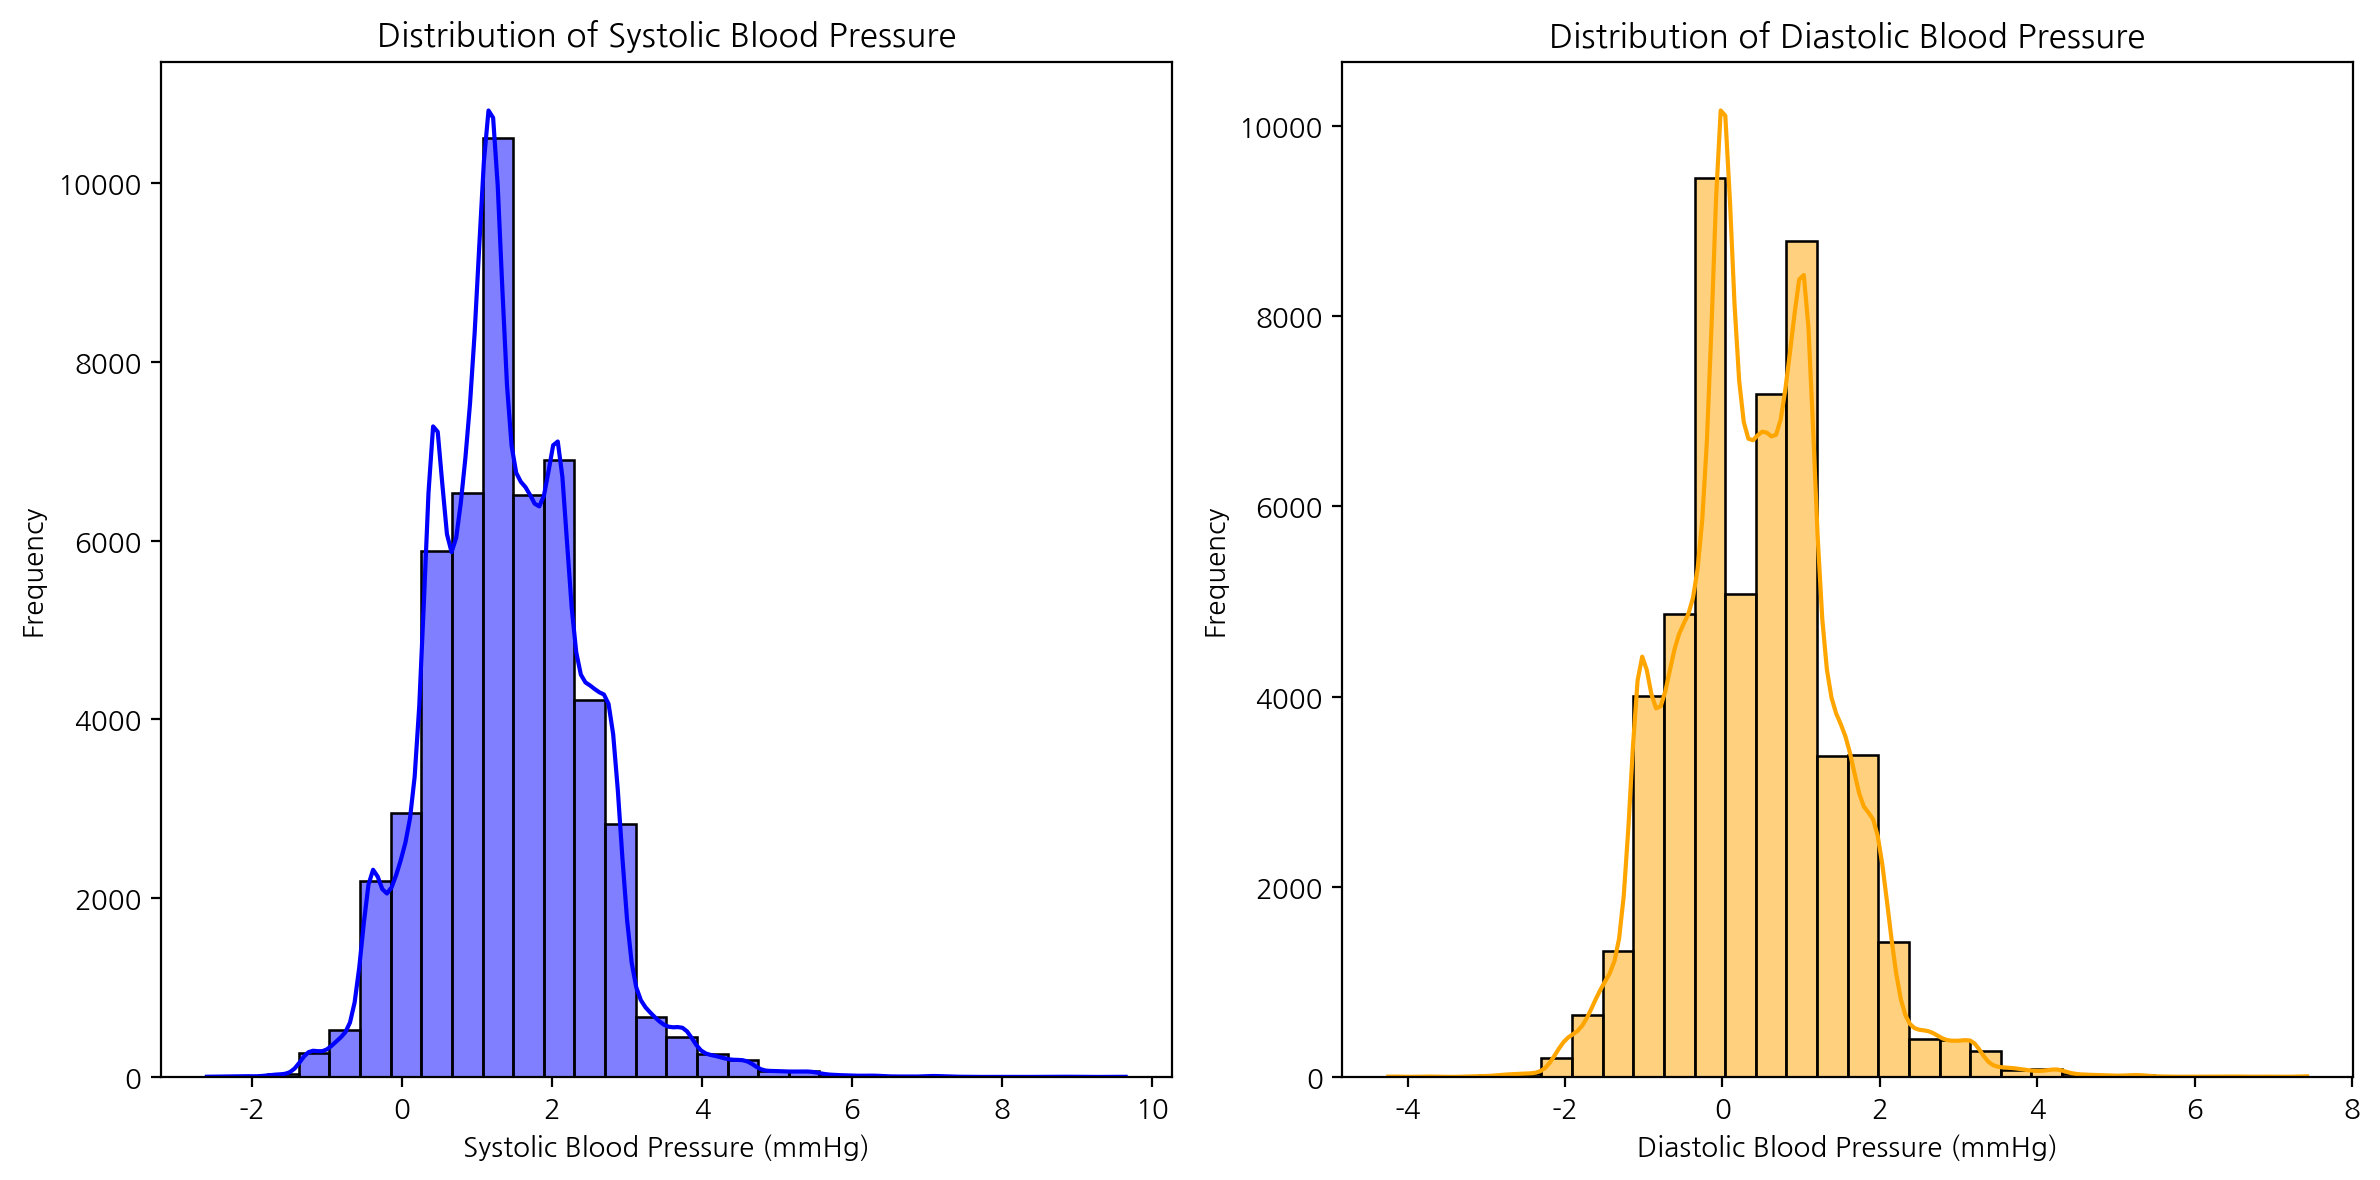

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수축기 혈압과 이완기 혈압의 분포 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Blood_Pressure_group['수축기혈압'], bins=30, kde=True, color='blue')
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')

# 이완기 혈압 분포
plt.subplot(1, 2, 2)
sns.histplot(Blood_Pressure_group['이완기혈압'], bins=30, kde=True, color='orange')
plt.title('Distribution of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

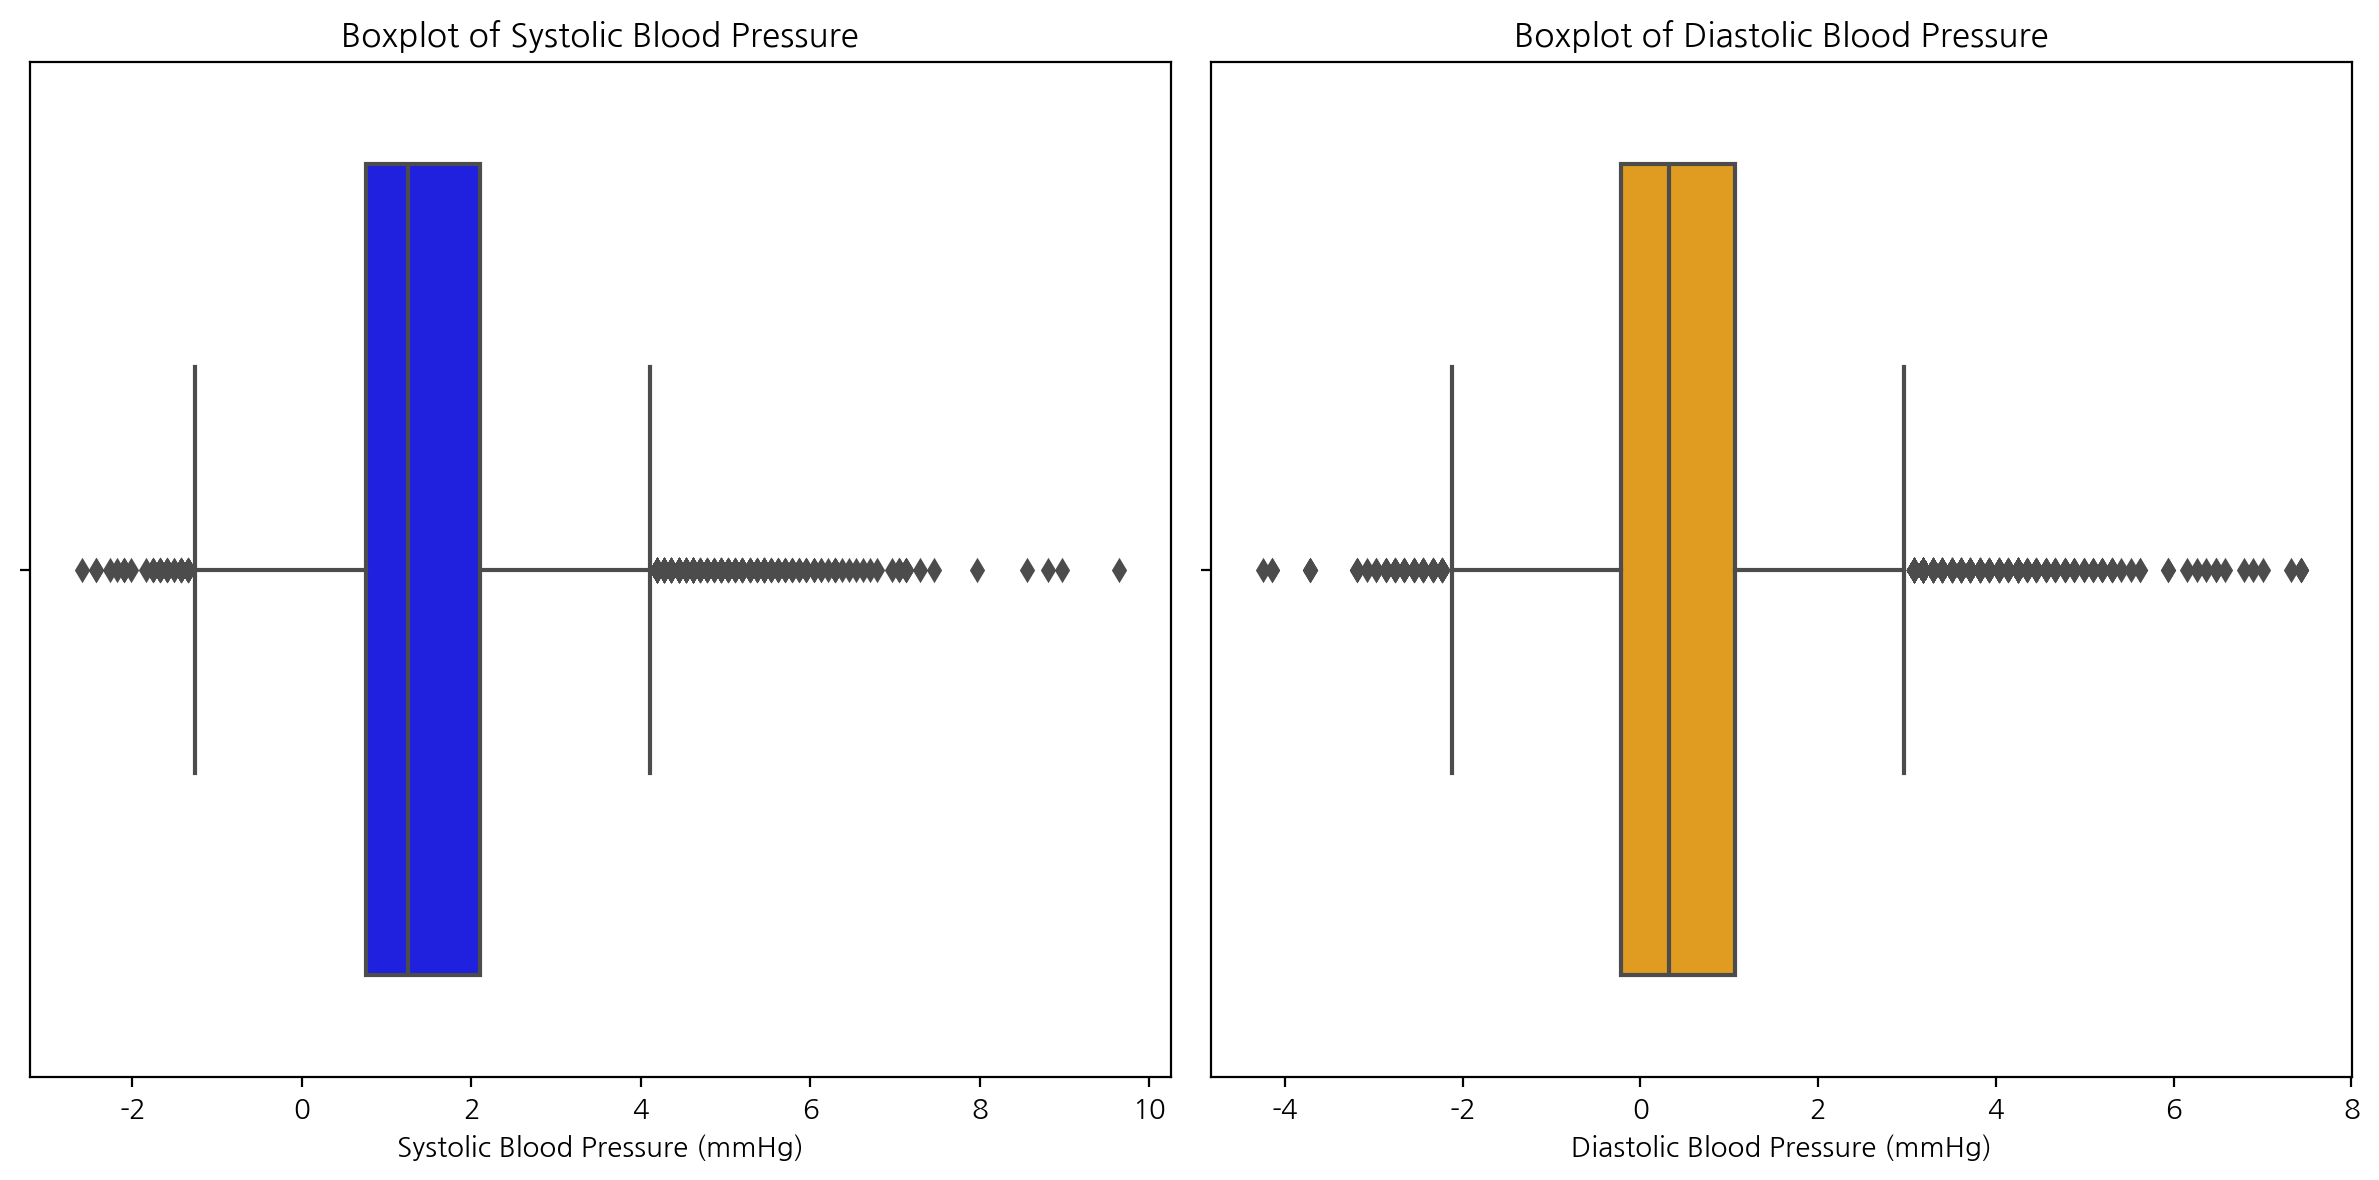

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=Blood_Pressure_group['수축기혈압'], color='blue')
plt.title('Boxplot of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure (mmHg)')

plt.subplot(1, 2, 2)
sns.boxplot(x=Blood_Pressure_group['이완기혈압'], color='orange')
plt.title('Boxplot of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()

In [10]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Blood_Pressure_group[['수축기혈압', '이완기혈압']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Blood_Pressure_group['수축기혈압_group'] = Blood_Pressure_group['수축기혈압'].apply(assign_group)
Blood_Pressure_group['이완기혈압_group'] = Blood_Pressure_group['이완기혈압'].apply(assign_group)

Blood_Pressure_group[['수축기혈압', '수축기혈압_group', '이완기혈압', '이완기혈압_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\3534505479.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Blood_Pressure_group['수축기혈압_group'] = Blood_Pressure_group['수축기혈압'].apply(assign_group)
C:\Users\sim\AppData\Local\Temp\ipykernel_5320\3534505479.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Blood_Pressure_group['이완기혈압_group'] = Blood_Pressure_group['이완기혈압'].apply(assign_group)


,수축기혈압,수축기혈압_group,이완기혈압,이완기혈압_group
0,1.258414,High,-0.106113,Low
1,0.419471,Moderate,0.000000,Low
2,2.516828,Very High,1.697804,Very High
3,2.516828,Very High,0.955014,High
4,-0.755048,Low,-0.848902,Low
...,...,...,...,...
51090,1.174520,High,0.530564,Moderate
51091,0.587260,Moderate,-0.106113,Low
51092,-0.167789,Low,-0.636676,Low
51093,1.342308,High,-0.212225,Low


In [11]:
print(q1, q2, q3)

0.1061127218315763 0.9228368783115698 1.5939909716290752


In [12]:
Blood_Pressure_group['수축기혈압_group'].value_counts()

수축기혈압_group
Very High    19481
High         14448
Moderate     12549
Low           4617
Name: count, dtype: int64

In [13]:
Blood_Pressure_group['이완기혈압_group'].value_counts()

이완기혈압_group
Low          21920
Moderate     13508
High         10525
Very High     5142
Name: count, dtype: int64

In [14]:
def classify_blood_pressure(row):
    if (row['수축기혈압_group'] == 'Low' and row['이완기혈압_group'] in ['High', 'Very High']) or \
       (row['수축기혈압_group'] == 'Moderate' and row['이완기혈압_group'] in ['High', 'Very High']) or \
       (row['수축기혈압_group'] == 'High') or \
       (row['수축기혈압_group'] == 'Very High'):
        return 'Hypertension'
    else:
        return 'Normal'

Blood_Pressure_group['분류'] = Blood_Pressure_group.apply(classify_blood_pressure, axis=1)
Blood_Pressure_group

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\257562653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Blood_Pressure_group['분류'] = Blood_Pressure_group.apply(classify_blood_pressure, axis=1)


,수축기혈압,이완기혈압,수축기혈압_group,이완기혈압_group,분류
0,1.258414,-0.106113,High,Low,Hypertension
1,0.419471,0.000000,Moderate,Low,Normal
2,2.516828,1.697804,Very High,Very High,Hypertension
3,2.516828,0.955014,Very High,High,Hypertension
4,-0.755048,-0.848902,Low,Low,Normal
...,...,...,...,...,...
51090,1.174520,0.530564,High,Moderate,Hypertension
51091,0.587260,-0.106113,Moderate,Low,Normal
51092,-0.167789,-0.636676,Low,Low,Normal
51093,1.342308,-0.212225,High,Low,Hypertension


In [15]:
Blood_Pressure_group['분류'].value_counts()

분류
Hypertension    34696
Normal          16399
Name: count, dtype: int64

## 2. 빈혈 그룹

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


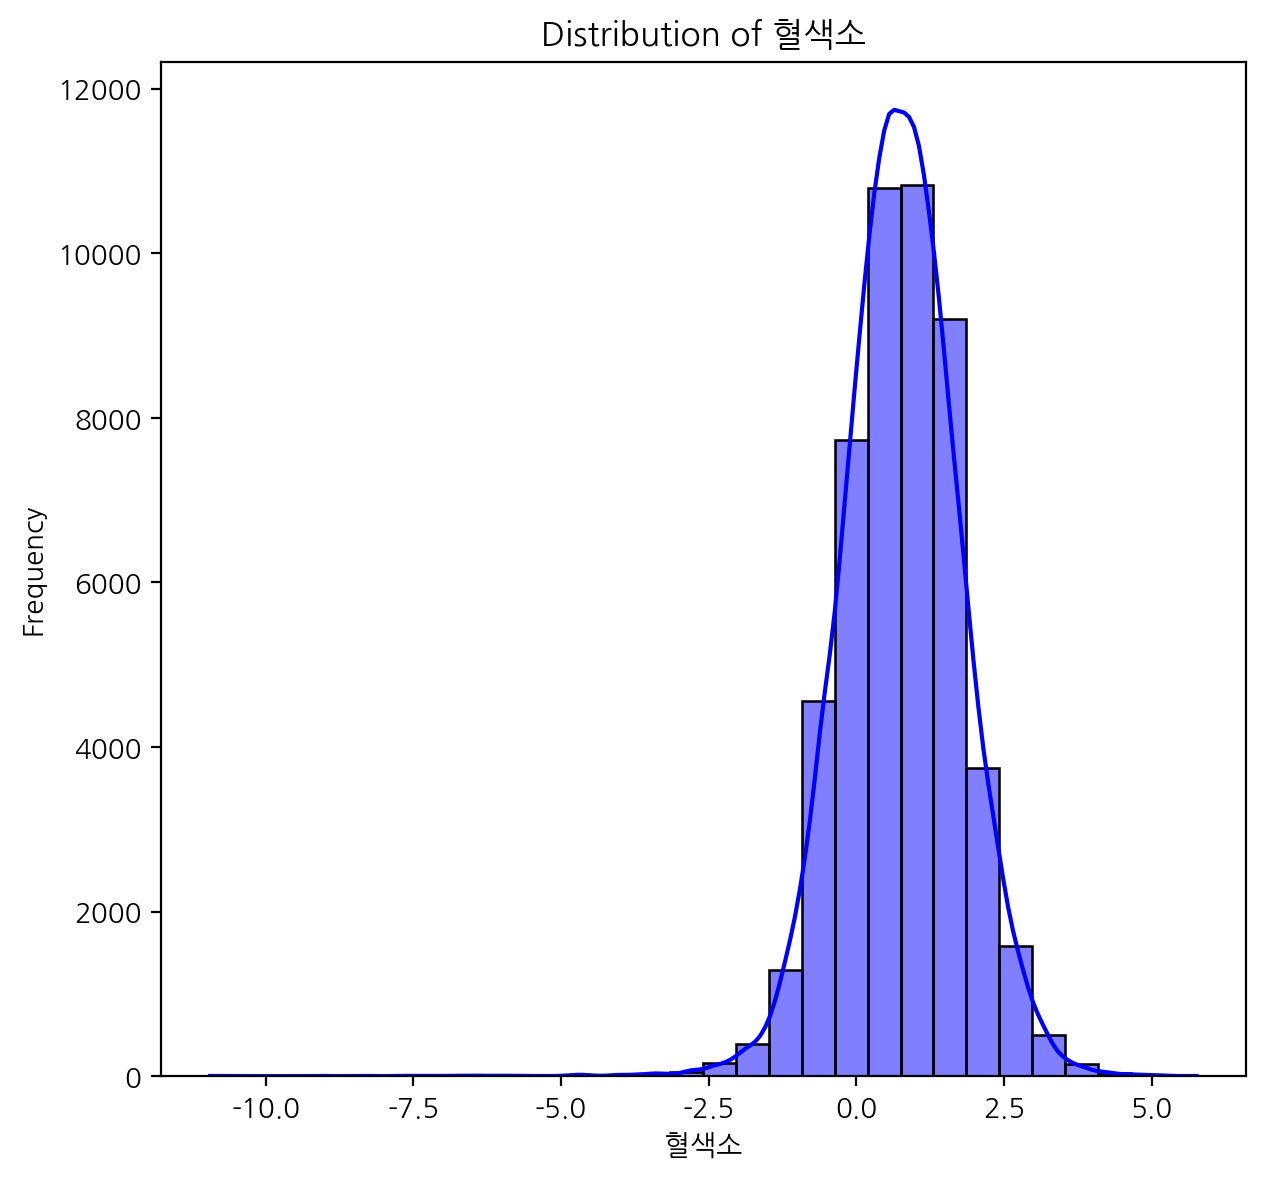

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Anemia_group['혈색소'], bins=30, kde=True, color='blue')
plt.title('Distribution of 혈색소')
plt.xlabel('혈색소')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

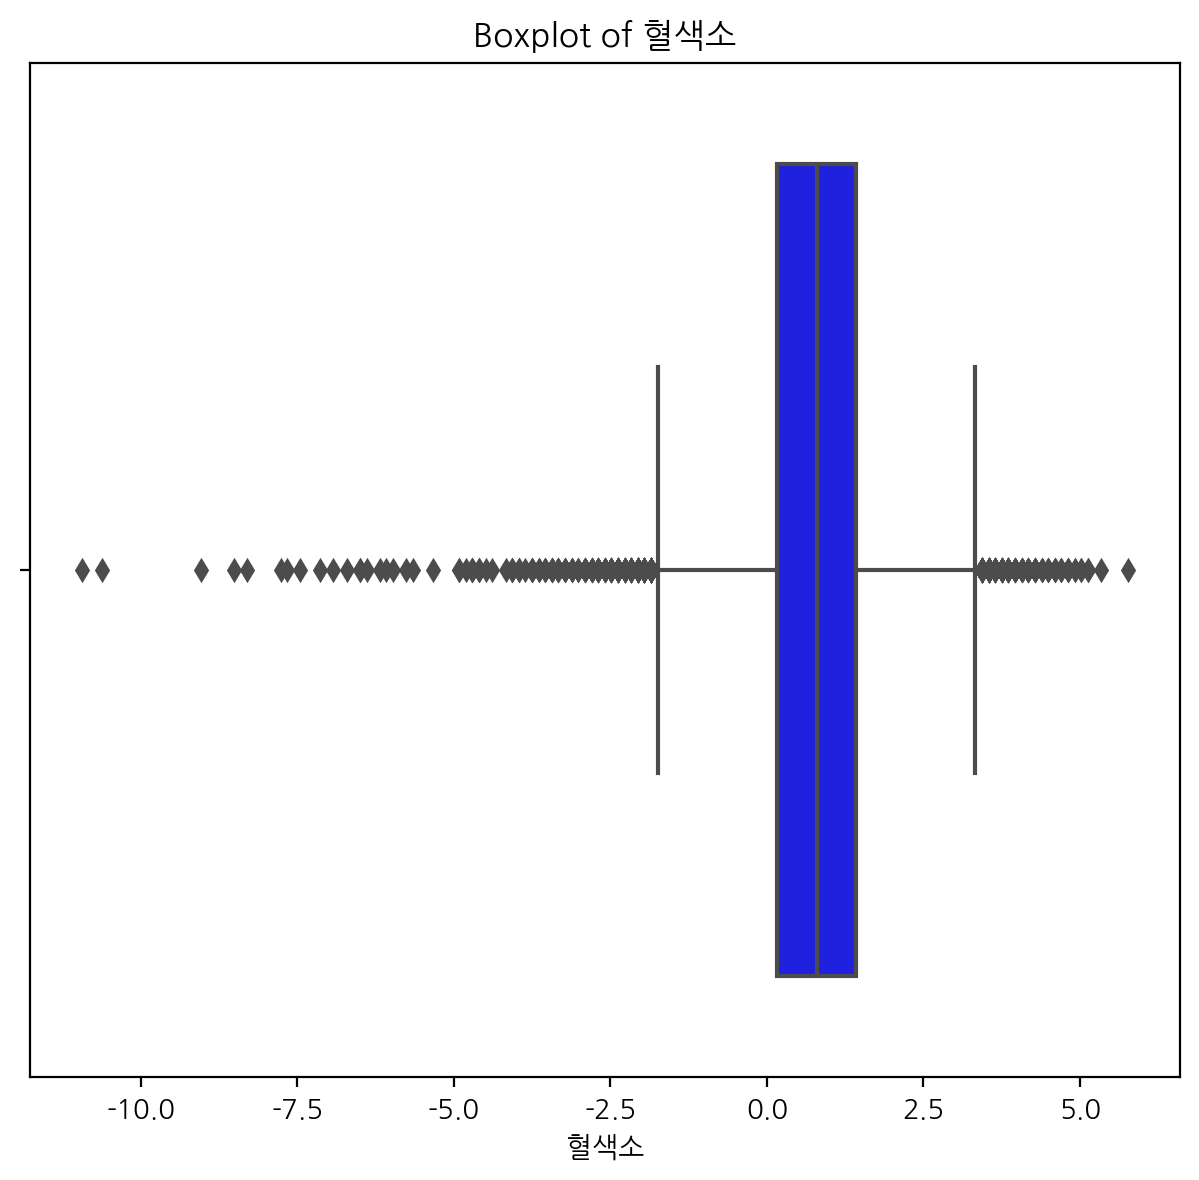

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=Anemia_group['혈색소'], color='blue')
plt.title('Boxplot of 혈색소')
plt.xlabel('혈색소')


plt.tight_layout()
plt.show()

In [18]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Anemia_group[['혈색소']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Anemia_group['혈색소_group'] = Anemia_group['혈색소'].apply(assign_group)

Anemia_group[['혈색소', '혈색소_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\4013957606.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anemia_group['혈색소_group'] = Anemia_group['혈색소'].apply(assign_group)


,혈색소,혈색소_group
0,0.158573,Low
1,0.158573,Low
2,0.898581,High
3,1.532874,Very High
4,0.475720,Moderate
...,...,...
51090,-1.215728,Low
51091,0.052858,Low
51092,1.532874,Very High
51093,1.321443,High


In [19]:
print(q1, q2, q3)

0.1585731813146979 0.7928659065734865 1.4271586318322775


In [20]:
Anemia_group['혈색소_group'].value_counts()

혈색소_group
Low          14262
Moderate     13057
High         12244
Very High    11532
Name: count, dtype: int64

In [21]:
def classify_anemia(row):
    if row['혈색소_group'] in ['Low', 'Moderate']:
        return 'Suspected Anemia'
    else:
        return 'Normal'

# 새로운 변수 '분류'에 조건에 따른 값을 채움
Anemia_group['분류'] = Anemia_group.apply(classify_anemia, axis=1)
Anemia_group

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\870751960.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anemia_group['분류'] = Anemia_group.apply(classify_anemia, axis=1)


,혈색소,혈색소_group,분류
0,0.158573,Low,Suspected Anemia
1,0.158573,Low,Suspected Anemia
2,0.898581,High,Normal
3,1.532874,Very High,Normal
4,0.475720,Moderate,Suspected Anemia
...,...,...,...
51090,-1.215728,Low,Suspected Anemia
51091,0.052858,Low,Suspected Anemia
51092,1.532874,Very High,Normal
51093,1.321443,High,Normal


In [22]:
Anemia_group['분류'].value_counts()

분류
Suspected Anemia    27319
Normal              23776
Name: count, dtype: int64

## 3. 간/신장 그룹

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

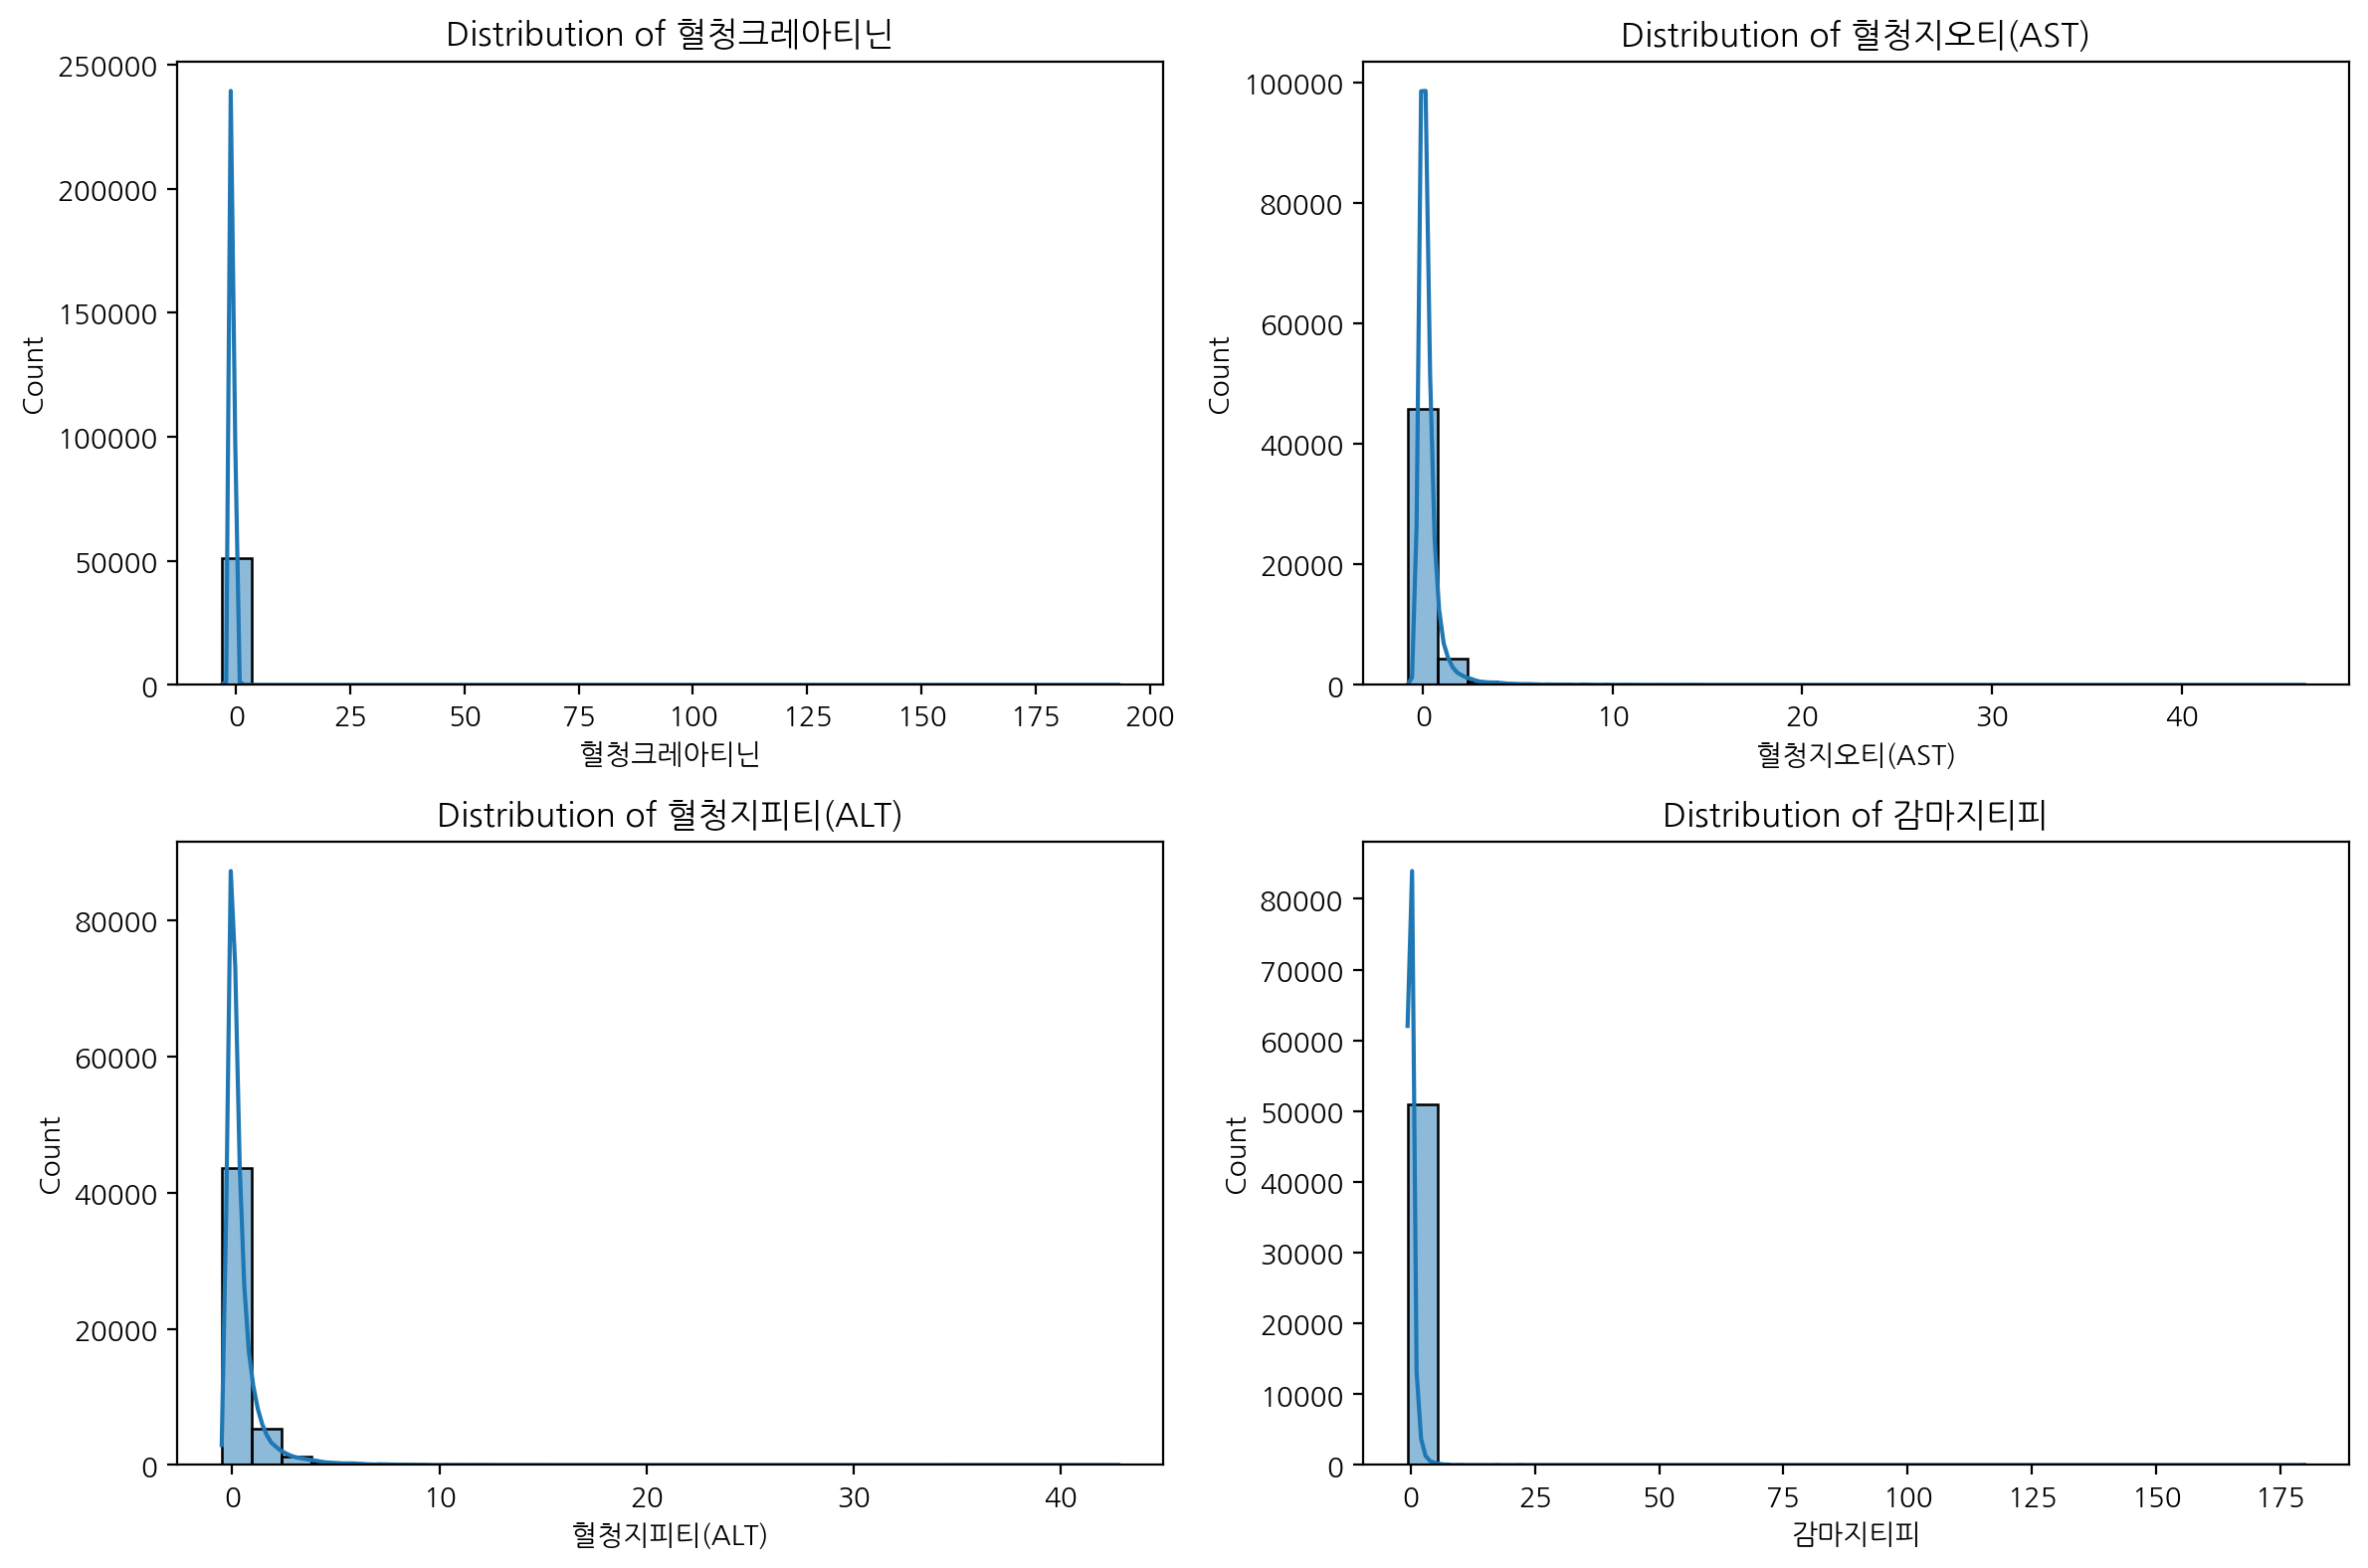

In [23]:
columns = ['혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']

# 히스토그램과 커널 밀도 추정 그래프를 함께 그리기
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


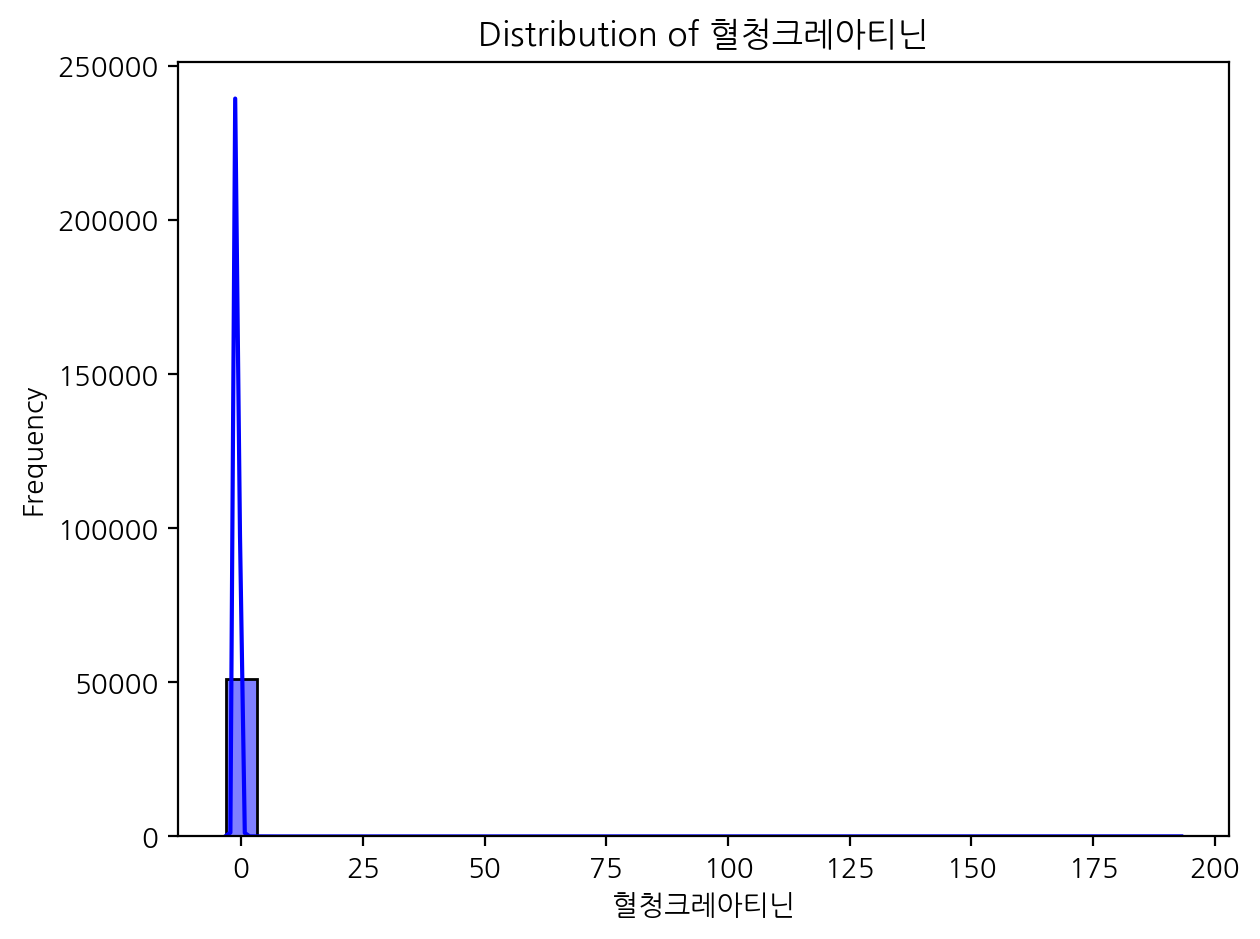

In [24]:
sns.histplot(Liver_Kidney_group['혈청크레아티닌'], bins=30, kde=True, color='blue')
plt.title('Distribution of 혈청크레아티닌')
plt.xlabel('혈청크레아티닌')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

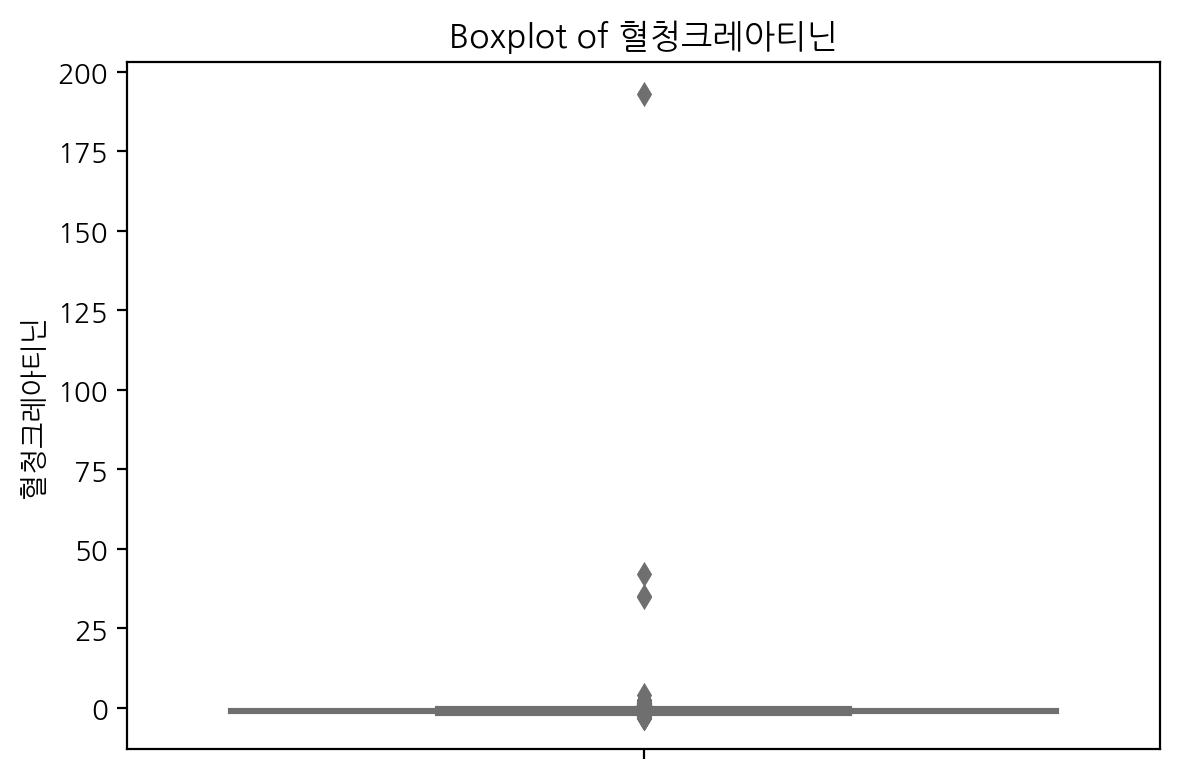

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=Liver_Kidney_group, y='혈청크레아티닌', color='skyblue')
plt.title('Boxplot of 혈청크레아티닌')
plt.ylabel('혈청크레아티닌')

plt.tight_layout()
plt.show()

In [26]:
Liver_Kidney_group['혈청크레아티닌'].value_counts()

혈청크레아티닌
-0.968937      13513
-0.692098      12037
-1.245777       9388
-0.415259       7304
-1.522616       3514
-0.138420       3251
 0.138420        962
-1.799455        663
 0.415259        261
-2.076294         85
 0.692098         52
 0.968937         18
-2.353134         13
 1.522616          7
-2.629973          5
-3.183651          5
-0.836779          4
 1.245777          3
 2.076294          3
 2.629973          1
 4.014169          1
 42.217985         1
 2.353134          1
 35.020164         1
 193.095372        1
 35.297003         1
Name: count, dtype: int64

In [27]:
Liver_Kidney_group['혈청지오티(AST)'].value_counts()

혈청지오티(AST)
 0.000000     3522
-0.043182     3429
 0.043182     3416
-0.086364     3310
 0.086364     3123
              ... 
 23.879710       1
 13.256910       1
 16.970572       1
 12.350085       1
 10.363708       1
Name: count, Length: 298, dtype: int64

In [28]:
Liver_Kidney_group['혈청지피티(ALT)'].value_counts()

혈청지피티(ALT)
-0.081157     2300
-0.016231     2278
-0.048694     2273
-0.113620     2244
 0.016231     2200
              ... 
 9.203202        1
 11.637912       1
 8.164393        1
 5.989386        1
 11.930077       1
Name: count, Length: 333, dtype: int64

In [29]:
Liver_Kidney_group['감마지티피'].value_counts()

감마지티피
-0.360985    2429
-0.379034    2415
-0.342936    2274
-0.397083    2218
-0.324886    2131
             ... 
 6.335285       1
 5.631364       1
 3.519603       1
 5.757709       1
 4.765000       1
Name: count, Length: 352, dtype: int64

In [30]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Liver_Kidney_group[['혈청크레아티닌']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Liver_Kidney_group['혈청크레아티닌_group'] = Liver_Kidney_group['혈청크레아티닌'].apply(assign_group)

Liver_Kidney_group[['혈청크레아티닌', '혈청크레아티닌_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\1164251364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['혈청크레아티닌_group'] = Liver_Kidney_group['혈청크레아티닌'].apply(assign_group)


,혈청크레아티닌,혈청크레아티닌_group
0,-1.522616,Low
1,-0.138420,Very High
2,-0.415259,Very High
3,-0.692098,High
4,-0.968937,Moderate
...,...,...
51090,-0.692098,High
51091,-1.522616,Low
51092,-0.415259,Very High
51093,-1.245777,Low


In [31]:
print(q1, q2, q3)

-1.2457765939185812 -0.9689373508255632 -0.6920981077325451


In [32]:
Liver_Kidney_group['혈청크레아티닌_group'].value_counts()

혈청크레아티닌_group
Low          13673
Moderate     13513
High         12041
Very High    11868
Name: count, dtype: int64

In [33]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Liver_Kidney_group[['혈청지오티(AST)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Liver_Kidney_group['혈청지오티(AST)_group'] = Liver_Kidney_group['혈청지오티(AST)'].apply(assign_group)

Liver_Kidney_group[['혈청지오티(AST)', '혈청지오티(AST)_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\4094487462.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['혈청지오티(AST)_group'] = Liver_Kidney_group['혈청지오티(AST)'].apply(assign_group)


,혈청지오티(AST),혈청지오티(AST)_group
0,0.475003,Very High
1,0.345457,High
2,0.734096,Very High
3,0.000000,Moderate
4,0.086364,Moderate
...,...,...
51090,0.431821,Very High
51091,0.129546,High
51092,-0.172728,Low
51093,1.209099,Very High


In [34]:
print(q1, q2, q3)

-0.0863642325109801 0.0863642325109801 0.3454569300439206


In [35]:
Liver_Kidney_group['혈청지오티(AST)_group'].value_counts()

혈청지오티(AST)_group
Moderate     13490
Low          13054
High         12425
Very High    12126
Name: count, dtype: int64

In [36]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Liver_Kidney_group[['혈청지피티(ALT)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Liver_Kidney_group['혈청지피티(ALT)_group'] = Liver_Kidney_group['혈청지피티(ALT)'].apply(assign_group)

Liver_Kidney_group[['혈청지피티(ALT)', '혈청지피티(ALT)_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\318487928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['혈청지피티(ALT)_group'] = Liver_Kidney_group['혈청지피티(ALT)'].apply(assign_group)


,혈청지피티(ALT),혈청지피티(ALT)_group
0,0.990115,Very High
1,0.113620,Moderate
2,0.892727,Very High
3,0.243471,High
4,-0.016231,Moderate
...,...,...
51090,0.113620,Moderate
51091,0.633024,Very High
51092,0.016231,Moderate
51093,2.808032,Very High


In [37]:
print(q1, q2, q3)

-0.0486941910583272 0.146082573174982 0.5356361016416007


In [38]:
Liver_Kidney_group['혈청지피티(ALT)_group'].value_counts()

혈청지피티(ALT)_group
Low          14683
Very High    12481
High         12016
Moderate     11915
Name: count, dtype: int64

In [39]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Liver_Kidney_group[['감마지티피']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Liver_Kidney_group['감마지티피_group'] = Liver_Kidney_group['감마지티피'].apply(assign_group)

Liver_Kidney_group[['감마지티피', '감마지티피_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\1626327061.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['감마지티피_group'] = Liver_Kidney_group['감마지티피'].apply(assign_group)


,감마지티피,감마지티피_group
0,-0.379034,Low
1,-0.234640,High
2,0.397083,Very High
3,-0.072197,High
4,-0.360985,Low
...,...,...
51090,-0.198542,High
51091,-0.270739,Moderate
51092,-0.415133,Low
51093,1.714678,Very High


In [40]:
print(q1, q2, q3)

-0.360984875742475 -0.2526894130197324 -0.0180492437871237


In [41]:
Liver_Kidney_group['혈청지피티(ALT)_group'].value_counts()

혈청지피티(ALT)_group
Low          14683
Very High    12481
High         12016
Moderate     11915
Name: count, dtype: int64

In [42]:
Liver_Kidney_group

,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,혈청크레아티닌_group,혈청지오티(AST)_group,혈청지피티(ALT)_group,감마지티피_group
0,-1.522616,0.475003,0.990115,-0.379034,Low,Very High,Very High,Low
1,-0.138420,0.345457,0.113620,-0.234640,Very High,High,Moderate,High
2,-0.415259,0.734096,0.892727,0.397083,Very High,Very High,Very High,Very High
3,-0.692098,0.000000,0.243471,-0.072197,High,Moderate,High,High
4,-0.968937,0.086364,-0.016231,-0.360985,Moderate,Moderate,Moderate,Low
...,...,...,...,...,...,...,...,...
51090,-0.692098,0.431821,0.113620,-0.198542,High,Very High,Moderate,High
51091,-1.522616,0.129546,0.633024,-0.270739,Low,High,Very High,Moderate
51092,-0.415259,-0.172728,0.016231,-0.415133,Very High,Low,Moderate,Low
51093,-1.245777,1.209099,2.808032,1.714678,Low,Very High,Very High,Very High


In [43]:
def classify(row):
    # 위험 기준 설정: 하나라도 'High' 또는 'Very High'일 경우 '위험'
    if (row['혈청크레아티닌_group'] in ['High', 'Very High'] or 
        row['혈청지오티(AST)_group'] in ['High', 'Very High'] or 
        row['혈청지피티(ALT)_group'] in ['High', 'Very High'] or 
        row['감마지티피_group'] in ['High', 'Very High']):
        return 'Suspected liver/kidney disease'
    else:
        return 'Normal'

# '분류' 열 생성
Liver_Kidney_group['분류'] = Liver_Kidney_group.apply(classify, axis=1)

# 결과 확인
Liver_Kidney_group[['혈청크레아티닌_group', '혈청지오티(AST)_group', 
                    '혈청지피티(ALT)_group', '감마지티피_group', '분류']].head()

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\1222373076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['분류'] = Liver_Kidney_group.apply(classify, axis=1)


,혈청크레아티닌_group,혈청지오티(AST)_group,혈청지피티(ALT)_group,감마지티피_group,분류
0,Low,Very High,Very High,Low,Suspected liver/kidney disease
1,Very High,High,Moderate,High,Suspected liver/kidney disease
2,Very High,Very High,Very High,Very High,Suspected liver/kidney disease
3,High,Moderate,High,High,Suspected liver/kidney disease
4,Moderate,Moderate,Moderate,Low,Normal


In [44]:
Liver_Kidney_group['분류'].value_counts()

분류
Suspected liver/kidney disease    42612
Normal                             8483
Name: count, dtype: int64

## 4. 비만도 그룹

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


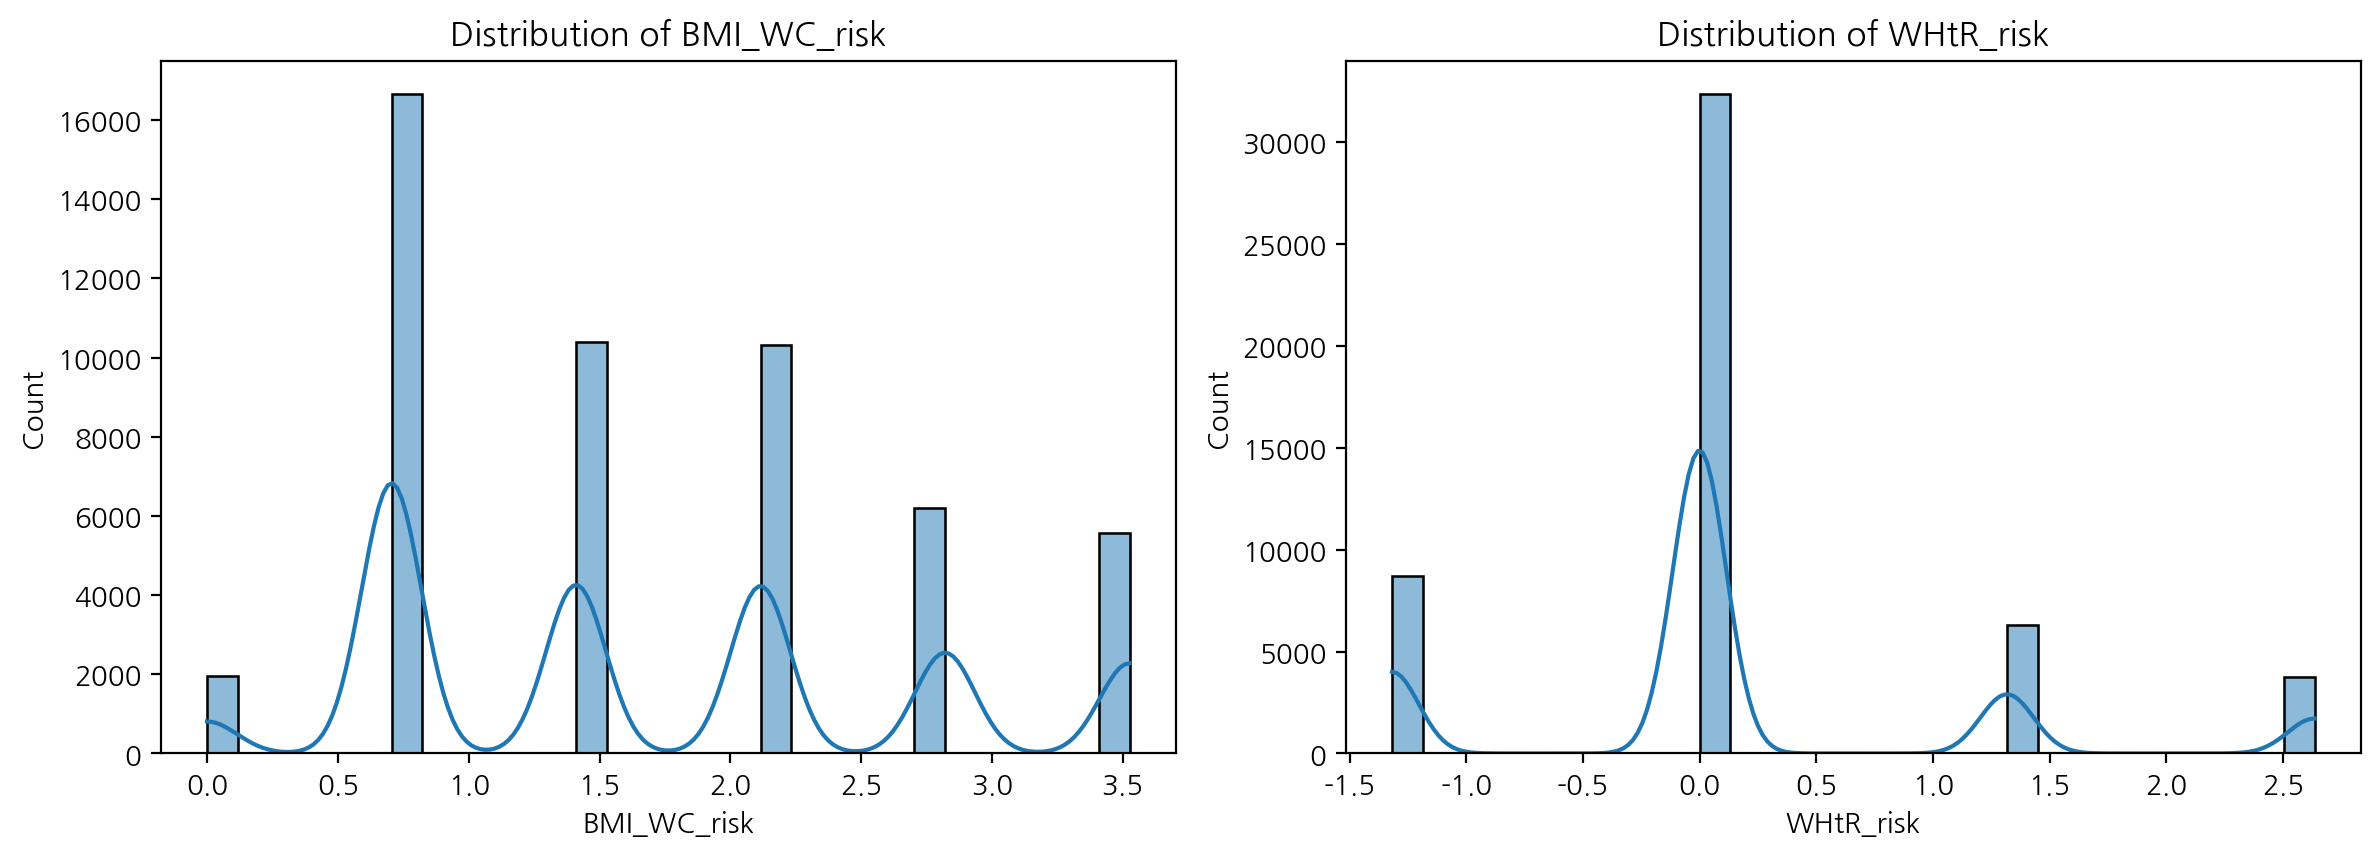

In [45]:
columns = ['BMI_WC_risk', 'WHtR_risk']

# 히스토그램과 커널 밀도 추정 그래프를 함께 그리기
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [46]:
Obesity_group['BMI_WC_risk'].describe()

count    51095.000000
mean         1.669899
std          0.999992
min          0.000000
25%          0.705089
50%          1.410177
75%          2.115266
max          3.525443
Name: BMI_WC_risk, dtype: float64

In [47]:
Obesity_group['BMI_WC_risk'].value_counts()

BMI_WC_risk
0.705089    16656
1.410177    10387
2.115266    10318
2.820355     6208
3.525443     5559
0.000000     1967
Name: count, dtype: int64

In [48]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Obesity_group[['BMI_WC_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Obesity_group['BMI_WC_risk_group'] = Obesity_group['BMI_WC_risk'].apply(assign_group)

Obesity_group[['BMI_WC_risk', 'BMI_WC_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\293260448.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Obesity_group['BMI_WC_risk_group'] = Obesity_group['BMI_WC_risk'].apply(assign_group)


,BMI_WC_risk,BMI_WC_risk_group
0,2.820355,Very High
1,1.410177,Moderate
2,2.115266,High
3,2.115266,High
4,0.000000,Low
...,...,...
51090,2.115266,High
51091,1.410177,Moderate
51092,0.705089,Low
51093,1.410177,Moderate


In [49]:
print(q1, q2, q3)

0.7050886392072224 1.4101772784144446 2.115265917621667


In [50]:
Obesity_group['BMI_WC_risk_group'].value_counts()

BMI_WC_risk_group
Low          18623
Very High    11767
Moderate     10387
High         10318
Name: count, dtype: int64

In [51]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Obesity_group[['WHtR_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Obesity_group['WHtR_risk_group'] = Obesity_group['WHtR_risk'].apply(assign_group)

Obesity_group[['WHtR_risk', 'WHtR_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\2401863591.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Obesity_group['WHtR_risk_group'] = Obesity_group['WHtR_risk'].apply(assign_group)


,WHtR_risk,WHtR_risk_group
0,1.317652,Very High
1,0.000000,Low
2,0.000000,Low
3,0.000000,Low
4,-1.317652,Low
...,...,...
51090,0.000000,Low
51091,0.000000,Low
51092,-1.317652,Low
51093,0.000000,Low


In [52]:
print(q1, q2, q3)

0.0 0.0 0.0


In [53]:
Obesity_group['WHtR_risk'].describe()

count    51095.000000
mean         0.130257
std          1.000019
min         -1.317652
25%          0.000000
50%          0.000000
75%          0.000000
max          2.635303
Name: WHtR_risk, dtype: float64

In [54]:
Obesity_group['WHtR_risk'].value_counts()

WHtR_risk
 0.000000    32344
-1.317652     8713
 1.317652     6312
 2.635303     3726
Name: count, dtype: int64

In [55]:
Obesity_group['WHtR_risk_group'].value_counts()

WHtR_risk_group
Low          41057
Very High    10038
Name: count, dtype: int64

In [56]:
Obesity_group

,BMI_WC_risk,WHtR_risk,BMI_WC_risk_group,WHtR_risk_group
0,2.820355,1.317652,Very High,Very High
1,1.410177,0.000000,Moderate,Low
2,2.115266,0.000000,High,Low
3,2.115266,0.000000,High,Low
4,0.000000,-1.317652,Low,Low
...,...,...,...,...
51090,2.115266,0.000000,High,Low
51091,1.410177,0.000000,Moderate,Low
51092,0.705089,-1.317652,Low,Low
51093,1.410177,0.000000,Moderate,Low


In [57]:
def classify(row):
    # 체중 증량 필요
    if row['BMI_WC_risk_group'] == 'Low' and row['WHtR_risk_group'] == 'Low':
        return 'Weight gain needed'
    
    # 정상
    elif (row['BMI_WC_risk_group'] in ['Low', 'Moderate'] and
          row['WHtR_risk_group'] in ['Low', 'Moderate']):
        return 'Normal'
    
    # 체중 감량 필요
    elif (row['BMI_WC_risk_group'] in ['High', 'Very High'] or 
          row['WHtR_risk_group'] in ['High', 'Very High']):
        return 'Weight loss needed'
    
    # 기본 값 (혹시 추가적인 조건이 필요한 경우)
    else:
        return 'Normal'

# '분류' 열 생성
Obesity_group['분류'] = Obesity_group.apply(classify, axis=1)

# 결과 확인
Obesity_group

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\332408.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Obesity_group['분류'] = Obesity_group.apply(classify, axis=1)


,BMI_WC_risk,WHtR_risk,BMI_WC_risk_group,WHtR_risk_group,분류
0,2.820355,1.317652,Very High,Very High,Weight loss needed
1,1.410177,0.000000,Moderate,Low,Normal
2,2.115266,0.000000,High,Low,Weight loss needed
3,2.115266,0.000000,High,Low,Weight loss needed
4,0.000000,-1.317652,Low,Low,Weight gain needed
...,...,...,...,...,...
51090,2.115266,0.000000,High,Low,Weight loss needed
51091,1.410177,0.000000,Moderate,Low,Normal
51092,0.705089,-1.317652,Low,Low,Weight gain needed
51093,1.410177,0.000000,Moderate,Low,Normal


In [58]:
Obesity_group['분류'].value_counts()

분류
Weight loss needed    22198
Weight gain needed    18602
Normal                10295
Name: count, dtype: int64

## 5. 흡연/음주 그룹

In [59]:
Smoking_Alcohol_group

,흡연상태,음주여부
0,0.000000,2.720519
1,2.181657,2.720519
2,2.181657,2.720519
3,0.000000,0.000000
4,2.181657,2.720519
...,...,...
51090,0.000000,0.000000
51091,1.090829,2.720519
51092,0.000000,2.720519
51093,0.000000,2.720519


- 흡연상태: 비흡연(1), 끊음(2), 흡연중(3) -> 철수행 : 1로 설정
- 음주여부: 비음주(0), 음주(1) : 철수행 : 0로 설정

In [60]:
Smoking_Alcohol_group['흡연상태'].value_counts()
# 0.000000 : 비흡연, 1.090829 : 끊음, 2.181657 : 흡연중

흡연상태
0.000000    27559
2.181657    17401
1.090829     6135
Name: count, dtype: int64

In [61]:
Smoking_Alcohol_group['음주여부'].value_counts()
# 0.000000 : 비음주, 2.720519 : 음주

음주여부
2.720519    42867
0.000000     8228
Name: count, dtype: int64

In [62]:
import numpy as np

def classify(row):
    # '흡연상태'가 0.0 또는 1.090829 근처이고, '음주여부'가 0.0 근처이면 'healthy'
    if np.isclose(row['흡연상태'], [0.0, 1.090829], atol=1e-6).any() and np.isclose(row['음주여부'], 0.0, atol=1e-6):
        return 'healthy'
    # '흡연상태'가 2.181657 근처이고, '음주여부'가 2.720519 근처이면 'Smoking and Alcohol'
    elif np.isclose(row['흡연상태'], 2.181657, atol=1e-6) and np.isclose(row['음주여부'], 2.720519, atol=1e-6):
        return 'Smoking and Alcohol'
    # '흡연상태'가 2.181657 근처이고, '음주여부'가 0.0 근처이면 'Smoking'
    elif np.isclose(row['흡연상태'], 2.181657, atol=1e-6) and np.isclose(row['음주여부'], 0.0, atol=1e-6):
        return 'Smoking'
    # '음주여부'가 2.720519 근처이고, '흡연상태'가 0.0 또는 1.090829 근처이면 'Alcohol'
    elif np.isclose(row['음주여부'], 2.720519, atol=1e-6) and np.isclose(row['흡연상태'], [0.0, 1.090829], atol=1e-6).any():
        return 'Alcohol'
    # 그 외는 'Unknown'
    else:
        return 'Unknown'

# '분류' 열 생성
Smoking_Alcohol_group['분류'] = Smoking_Alcohol_group.apply(classify, axis=1)

# 결과 확인
print(Smoking_Alcohol_group['분류'].value_counts())

분류
Alcohol                27035
Smoking and Alcohol    15832
healthy                 6659
Smoking                 1569
Name: count, dtype: int64


C:\Users\sim\AppData\Local\Temp\ipykernel_5320\865020799.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Smoking_Alcohol_group['분류'] = Smoking_Alcohol_group.apply(classify, axis=1)


In [63]:
Smoking_Alcohol_group

,흡연상태,음주여부,분류
0,0.000000,2.720519,Alcohol
1,2.181657,2.720519,Smoking and Alcohol
2,2.181657,2.720519,Smoking and Alcohol
3,0.000000,0.000000,healthy
4,2.181657,2.720519,Smoking and Alcohol
...,...,...,...
51090,0.000000,0.000000,healthy
51091,1.090829,2.720519,Alcohol
51092,0.000000,2.720519,Alcohol
51093,0.000000,2.720519,Alcohol


In [64]:
display(Blood_Pressure_group.head())
display(Anemia_group.head())
display(Liver_Kidney_group.head())
display(Obesity_group.head())
display(Smoking_Alcohol_group.head())
display(Vision_group.head())
display(Hearing_group.head())
display(Diabetes_group.head())
display(Cardiovascular_group.head())

,수축기혈압,이완기혈압,수축기혈압_group,이완기혈압_group,분류
0,1.258414,-0.106113,High,Low,Hypertension
1,0.419471,0.000000,Moderate,Low,Normal
2,2.516828,1.697804,Very High,Very High,Hypertension
3,2.516828,0.955014,Very High,High,Hypertension
4,-0.755048,-0.848902,Low,Low,Normal


,혈색소,혈색소_group,분류
0,0.158573,Low,Suspected Anemia
1,0.158573,Low,Suspected Anemia
2,0.898581,High,Normal
3,1.532874,Very High,Normal
4,0.475720,Moderate,Suspected Anemia


,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,혈청크레아티닌_group,혈청지오티(AST)_group,혈청지피티(ALT)_group,감마지티피_group,분류
0,-1.522616,0.475003,0.990115,-0.379034,Low,Very High,Very High,Low,Suspected liver/kidney disease
1,-0.138420,0.345457,0.113620,-0.234640,Very High,High,Moderate,High,Suspected liver/kidney disease
2,-0.415259,0.734096,0.892727,0.397083,Very High,Very High,Very High,Very High,Suspected liver/kidney disease
3,-0.692098,0.000000,0.243471,-0.072197,High,Moderate,High,High,Suspected liver/kidney disease
4,-0.968937,0.086364,-0.016231,-0.360985,Moderate,Moderate,Moderate,Low,Normal


,BMI_WC_risk,WHtR_risk,BMI_WC_risk_group,WHtR_risk_group,분류
0,2.820355,1.317652,Very High,Very High,Weight loss needed
1,1.410177,0.000000,Moderate,Low,Normal
2,2.115266,0.000000,High,Low,Weight loss needed
3,2.115266,0.000000,High,Low,Weight loss needed
4,0.000000,-1.317652,Low,Low,Weight gain needed


,흡연상태,음주여부,분류
0,0.000000,2.720519,Alcohol
1,2.181657,2.720519,Smoking and Alcohol
2,2.181657,2.720519,Smoking and Alcohol
3,0.000000,0.000000,healthy
4,2.181657,2.720519,Smoking and Alcohol


,시력
0,0.680267
1,2.040800
2,-0.544213
3,-0.952373
4,0.408160


,청력
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,요단백,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk
0,0.0,0.138930,2.820355,1.317652
1,0.0,0.416790,1.410177,0.000000
2,0.0,0.625186,2.115266,0.000000
3,0.0,0.555720,2.115266,0.000000
4,0.0,-0.486255,0.000000,-1.317652


,수축기혈압,이완기혈압,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,혈청지오티(AST),혈청지피티(ALT),감마지티피
0,1.258414,-0.106113,0.138930,2.820355,1.317652,0.475003,0.990115,-0.379034
1,0.419471,0.000000,0.416790,1.410177,0.000000,0.345457,0.113620,-0.234640
2,2.516828,1.697804,0.625186,2.115266,0.000000,0.734096,0.892727,0.397083
3,2.516828,0.955014,0.555720,2.115266,0.000000,0.000000,0.243471,-0.072197
4,-0.755048,-0.848902,-0.486255,0.000000,-1.317652,0.086364,-0.016231,-0.360985


## 6. 시력 그룹

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


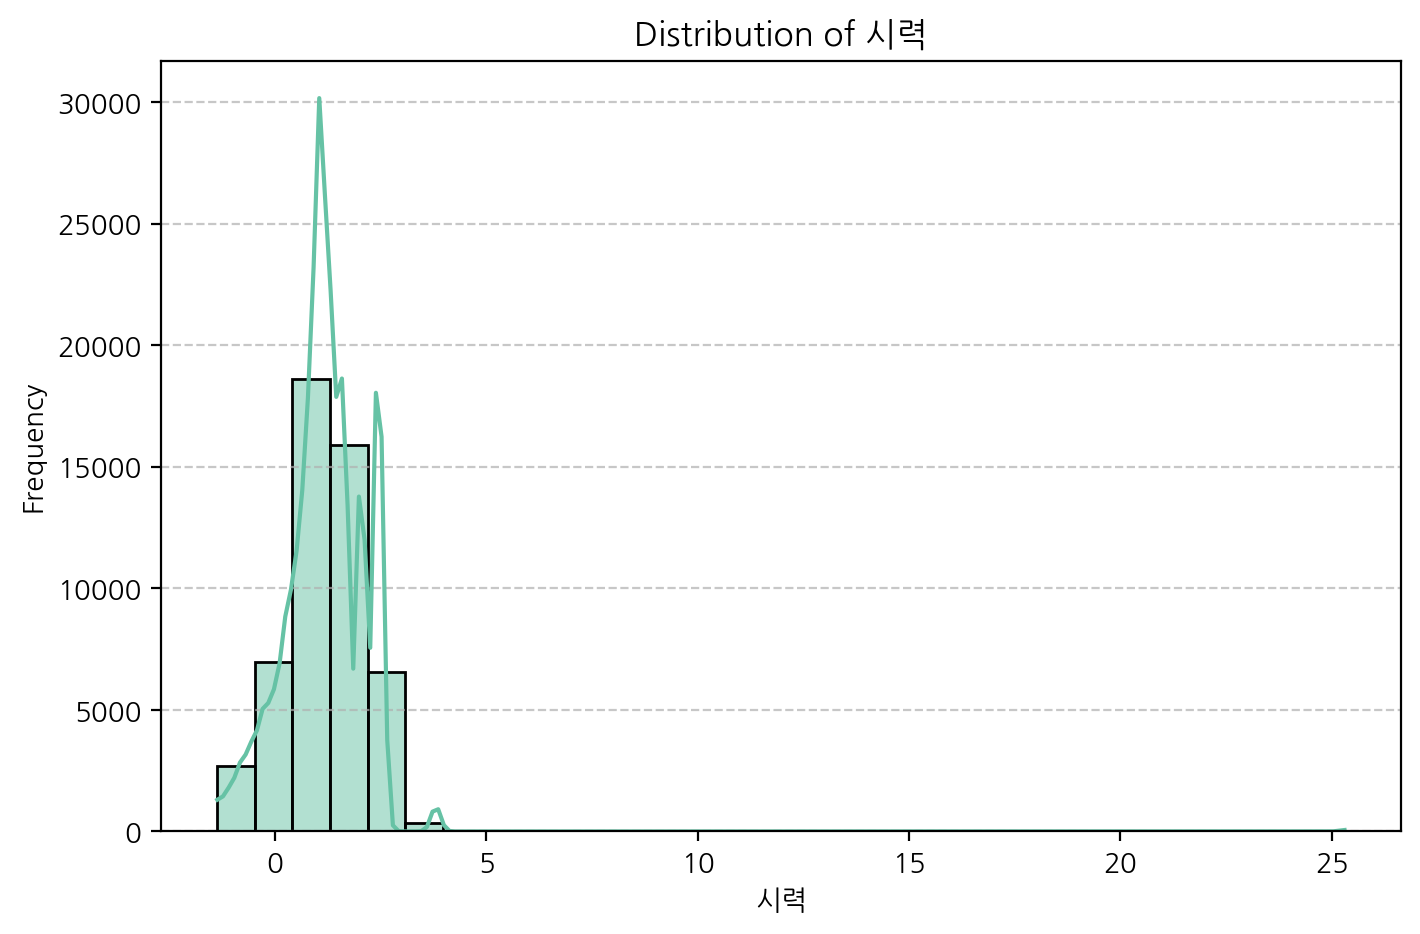

In [65]:
# 시력 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(Vision_group['시력'],kde=True, bins=30, color='#66c2a5', edgecolor='black')
plt.title('Distribution of 시력')
plt.xlabel('시력')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

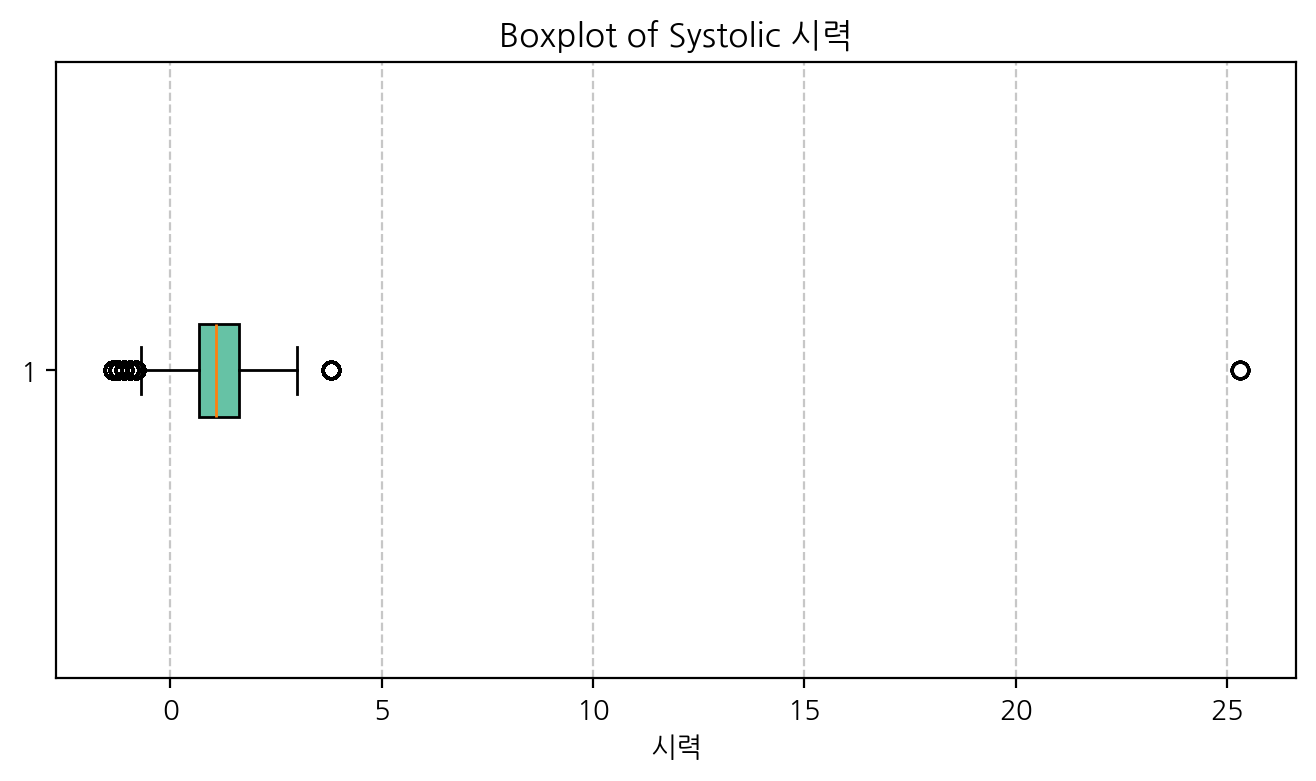

In [66]:
# 박스플롯 그리기
plt.figure(figsize=(8, 4))
plt.boxplot(Vision_group['시력'], patch_artist=True, vert=False, boxprops=dict(facecolor='#66c2a5', color='black'))
plt.title('Boxplot of Systolic 시력')
plt.xlabel('시력')
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [67]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Vision_group[['시력']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Vision_group['시력_group'] = Vision_group['시력'].apply(assign_group)


Vision_group

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\976081901.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vision_group['시력_group'] = Vision_group['시력'].apply(assign_group)


,시력,시력_group
0,0.680267,Low
1,2.040800,Very High
2,-0.544213,Low
3,-0.952373,Low
4,0.408160,Low
...,...,...
51090,2.448960,Very High
51091,1.088427,Moderate
51092,2.448960,Very High
51093,1.632640,High


In [68]:
print(q1, q2, q3)

0.6802665625644876 1.08842650010318 1.6326397501547696


In [69]:
Vision_group['시력_group'].value_counts()

시력_group
Low          13600
Moderate     13144
High         12561
Very High    11790
Name: count, dtype: int64

In [70]:
def classify_Vision(row):
    if row['시력_group'] in ['Low', 'Moderate']:
        return 'Vision risk'
    else:
        return 'Normal'

# 새로운 변수 '분류'에 조건에 따른 값을 채움
Vision_group['분류'] = Vision_group.apply(classify_Vision, axis=1)
Vision_group

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\3978749390.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vision_group['분류'] = Vision_group.apply(classify_Vision, axis=1)


,시력,시력_group,분류
0,0.680267,Low,Vision risk
1,2.040800,Very High,Normal
2,-0.544213,Low,Vision risk
3,-0.952373,Low,Vision risk
4,0.408160,Low,Vision risk
...,...,...,...
51090,2.448960,Very High,Normal
51091,1.088427,Moderate,Vision risk
51092,2.448960,Very High,Normal
51093,1.632640,High,Normal


In [71]:
Vision_group['분류'].value_counts()

분류
Vision risk    26744
Normal         24351
Name: count, dtype: int64

## 7. 청력 그룹

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


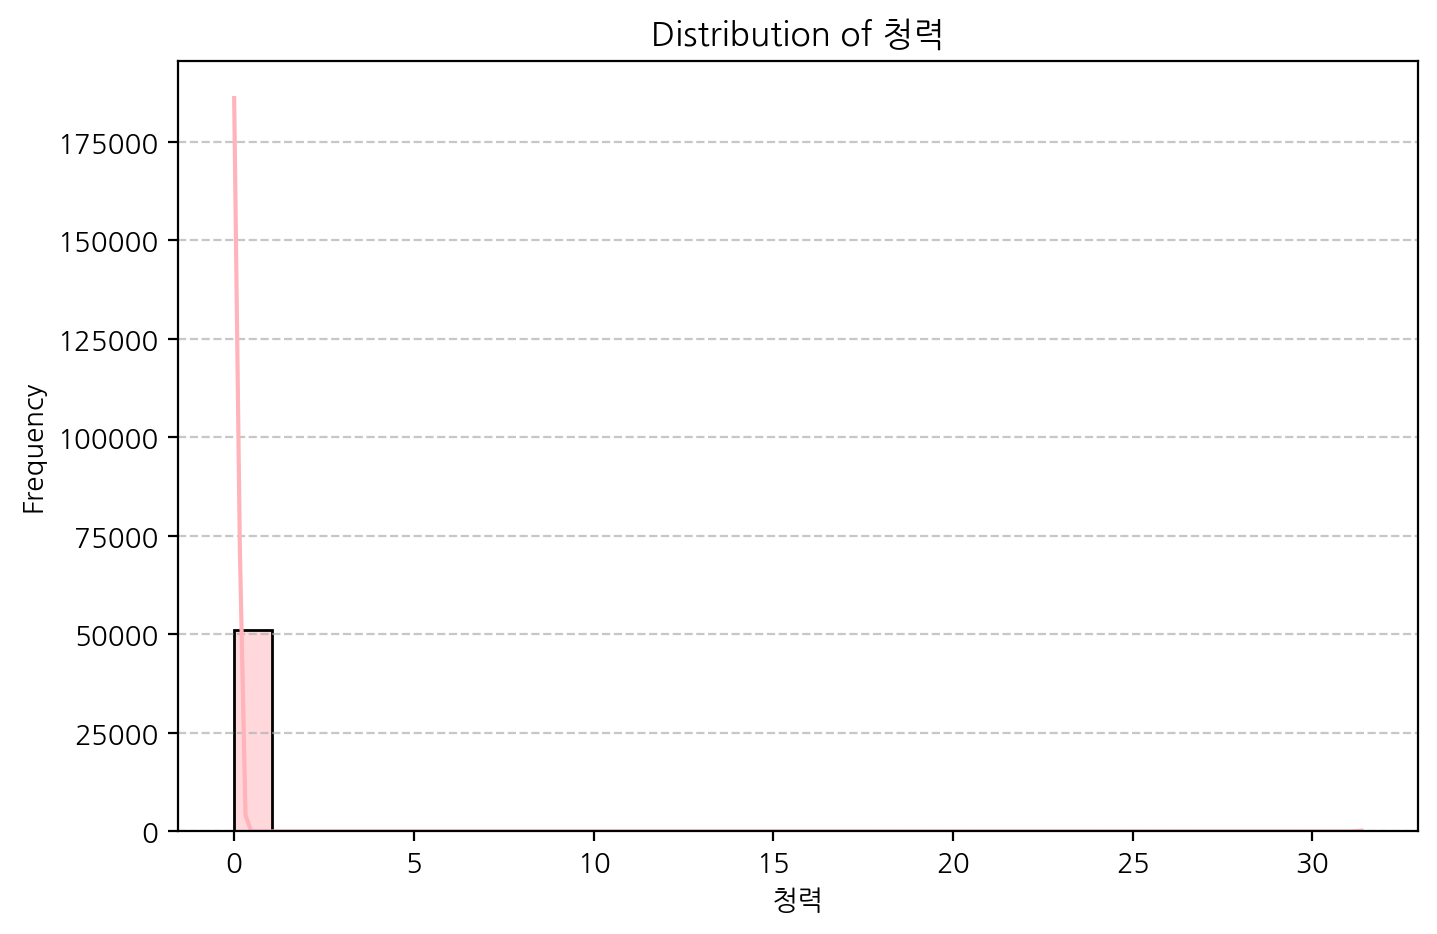

In [72]:
# 청력 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(Hearing_group['청력'], bins=30, color='#FFB3BA', edgecolor='black',kde=True)
plt.title('Distribution of 청력')
plt.xlabel('청력')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [73]:
Hearing_group.value_counts()
# 0.000000 : 정상, 43.053301 : 청력 위험

청력       
0.000000     51043
31.362659       52
Name: count, dtype: int64

In [74]:
# 분류 열 생성
Hearing_group['분류'] = Hearing_group['청력'].apply(lambda x: 'Normal' if x == 0.000000 else 'Hearing risk')

# 결과 확인
Hearing_group

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\205143681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hearing_group['분류'] = Hearing_group['청력'].apply(lambda x: 'Normal' if x == 0.000000 else 'Hearing risk')


,청력,분류
0,0.0,Normal
1,0.0,Normal
2,0.0,Normal
3,0.0,Normal
4,0.0,Normal
...,...,...
51090,0.0,Normal
51091,0.0,Normal
51092,0.0,Normal
51093,0.0,Normal


In [75]:
Hearing_group['분류'].value_counts()

분류
Normal          51043
Hearing risk       52
Name: count, dtype: int64

## 8. 당뇨 그룹

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

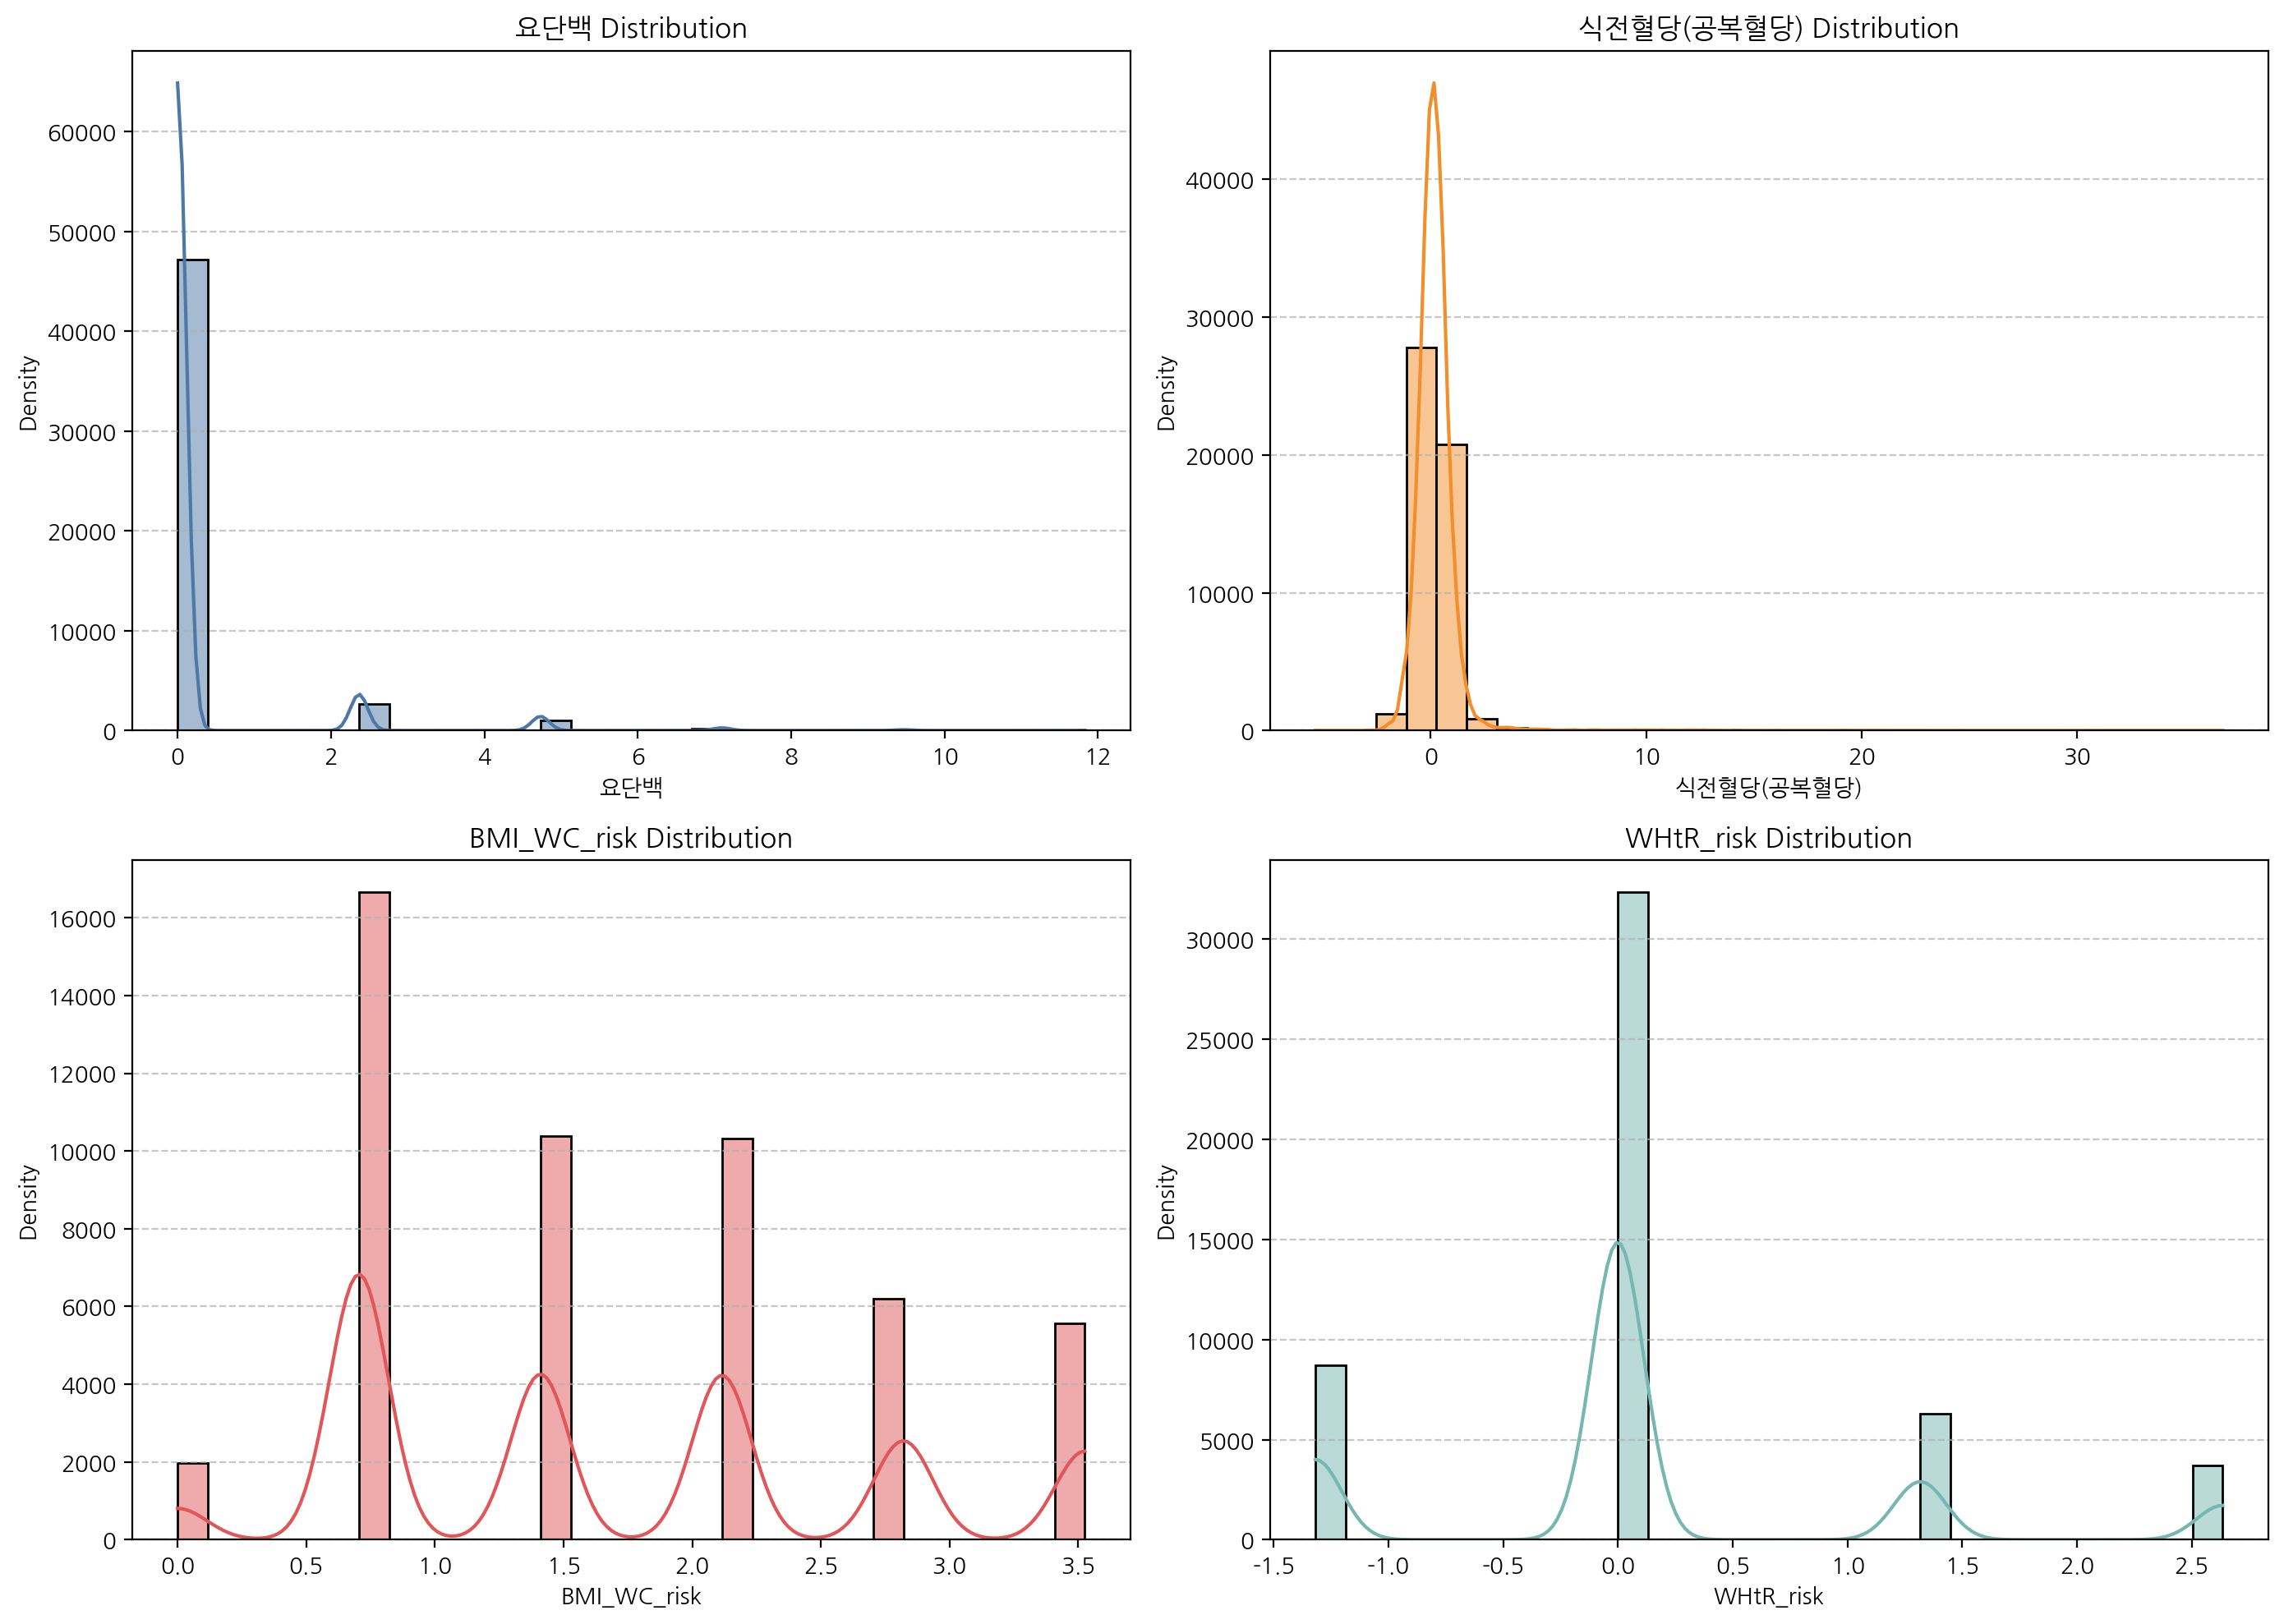

In [76]:
plt.figure(figsize=(14, 10))
variables = ['요단백', '식전혈당(공복혈당)', 'BMI_WC_risk', 'WHtR_risk']
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']

# 각 변수에 대해 히스토그램과 KDE 그래프 생성
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(Diabetes_group[var], kde=True, color=colors[i-1], bins=30)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [77]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Diabetes_group[['요단백']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Diabetes_group['요단백_group'] = Diabetes_group['요단백'].apply(assign_group)

Diabetes_group[['요단백', '요단백_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\3104202044.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['요단백_group'] = Diabetes_group['요단백'].apply(assign_group)


,요단백,요단백_group
0,0.0,Low
1,0.0,Low
2,0.0,Low
3,0.0,Low
4,0.0,Low
...,...,...
51090,0.0,Low
51091,0.0,Low
51092,0.0,Low
51093,0.0,Low


In [78]:
Diabetes_group['요단백_group'].value_counts()

요단백_group
Low          47153
Very High     3942
Name: count, dtype: int64

In [79]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Diabetes_group[['식전혈당(공복혈당)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Diabetes_group['식전혈당_group'] = Diabetes_group['식전혈당(공복혈당)'].apply(assign_group)

Diabetes_group[['식전혈당(공복혈당)', '식전혈당_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\3331848173.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['식전혈당_group'] = Diabetes_group['식전혈당(공복혈당)'].apply(assign_group)


,식전혈당(공복혈당),식전혈당_group
0,0.138930,Moderate
1,0.416790,High
2,0.625186,Very High
3,0.555720,High
4,-0.486255,Low
...,...,...
51090,0.694651,Very High
51091,-0.347325,Low
51092,0.069465,Moderate
51093,0.486255,High


In [80]:
print(q1, q2, q3)

-0.2778602250653545 0.1389301125326772 0.555720450130709


In [81]:
Diabetes_group['식전혈당_group'].value_counts()

식전혈당_group
Moderate     13568
Low          13126
High         12663
Very High    11738
Name: count, dtype: int64

In [82]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Diabetes_group[['BMI_WC_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Diabetes_group['BMI_WC_risk_group'] = Diabetes_group['BMI_WC_risk'].apply(assign_group)

Diabetes_group[['BMI_WC_risk', 'BMI_WC_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\1371003698.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['BMI_WC_risk_group'] = Diabetes_group['BMI_WC_risk'].apply(assign_group)


,BMI_WC_risk,BMI_WC_risk_group
0,2.820355,Very High
1,1.410177,Moderate
2,2.115266,High
3,2.115266,High
4,0.000000,Low
...,...,...
51090,2.115266,High
51091,1.410177,Moderate
51092,0.705089,Low
51093,1.410177,Moderate


In [83]:
print(q1, q2, q3)

0.7050886392072224 1.4101772784144446 2.115265917621667


In [84]:
Diabetes_group['BMI_WC_risk_group'].value_counts()

BMI_WC_risk_group
Low          18623
Very High    11767
Moderate     10387
High         10318
Name: count, dtype: int64

In [85]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Diabetes_group[['WHtR_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Diabetes_group['WHtR_risk_group'] = Diabetes_group['WHtR_risk'].apply(assign_group)

Diabetes_group[['WHtR_risk', 'WHtR_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\3251133969.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['WHtR_risk_group'] = Diabetes_group['WHtR_risk'].apply(assign_group)


,WHtR_risk,WHtR_risk_group
0,1.317652,Very High
1,0.000000,Low
2,0.000000,Low
3,0.000000,Low
4,-1.317652,Low
...,...,...
51090,0.000000,Low
51091,0.000000,Low
51092,-1.317652,Low
51093,0.000000,Low


In [86]:
print(q1, q2, q3)

0.0 0.0 0.0


In [87]:
Diabetes_group['WHtR_risk_group'].value_counts()

WHtR_risk_group
Low          41057
Very High    10038
Name: count, dtype: int64

In [88]:
Diabetes_group

,요단백,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,요단백_group,식전혈당_group,BMI_WC_risk_group,WHtR_risk_group
0,0.0,0.138930,2.820355,1.317652,Low,Moderate,Very High,Very High
1,0.0,0.416790,1.410177,0.000000,Low,High,Moderate,Low
2,0.0,0.625186,2.115266,0.000000,Low,Very High,High,Low
3,0.0,0.555720,2.115266,0.000000,Low,High,High,Low
4,0.0,-0.486255,0.000000,-1.317652,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...
51090,0.0,0.694651,2.115266,0.000000,Low,Very High,High,Low
51091,0.0,-0.347325,1.410177,0.000000,Low,Low,Moderate,Low
51092,0.0,0.069465,0.705089,-1.317652,Low,Moderate,Low,Low
51093,0.0,0.486255,1.410177,0.000000,Low,High,Moderate,Low


In [89]:
def classify(row):
    # 위험 기준 설정: 하나라도 'High' 또는 'Very High'일 경우 '위험'
    if (row['요단백_group'] in ['High', 'Very High'] or 
        row['식전혈당_group'] in ['High', 'Very High'] or 
        row['BMI_WC_risk_group'] in ['High', 'Very High'] or 
        row['WHtR_risk_group'] in ['High', 'Very High']):
        return 'Suspected Diabetes'
    else:
        return 'Normal'

# '분류' 열 생성
Diabetes_group['분류'] = Diabetes_group.apply(classify, axis=1)

# 결과 확인
Diabetes_group

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\2308475523.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['분류'] = Diabetes_group.apply(classify, axis=1)


,요단백,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,요단백_group,식전혈당_group,BMI_WC_risk_group,WHtR_risk_group,분류
0,0.0,0.138930,2.820355,1.317652,Low,Moderate,Very High,Very High,Suspected Diabetes
1,0.0,0.416790,1.410177,0.000000,Low,High,Moderate,Low,Suspected Diabetes
2,0.0,0.625186,2.115266,0.000000,Low,Very High,High,Low,Suspected Diabetes
3,0.0,0.555720,2.115266,0.000000,Low,High,High,Low,Suspected Diabetes
4,0.0,-0.486255,0.000000,-1.317652,Low,Low,Low,Low,Normal
...,...,...,...,...,...,...,...,...,...
51090,0.0,0.694651,2.115266,0.000000,Low,Very High,High,Low,Suspected Diabetes
51091,0.0,-0.347325,1.410177,0.000000,Low,Low,Moderate,Low,Normal
51092,0.0,0.069465,0.705089,-1.317652,Low,Moderate,Low,Low,Normal
51093,0.0,0.486255,1.410177,0.000000,Low,High,Moderate,Low,Suspected Diabetes


In [90]:
Diabetes_group['분류'].value_counts()

분류
Suspected Diabetes    35776
Normal                15319
Name: count, dtype: int64

## 9. 심혈관 그룹

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

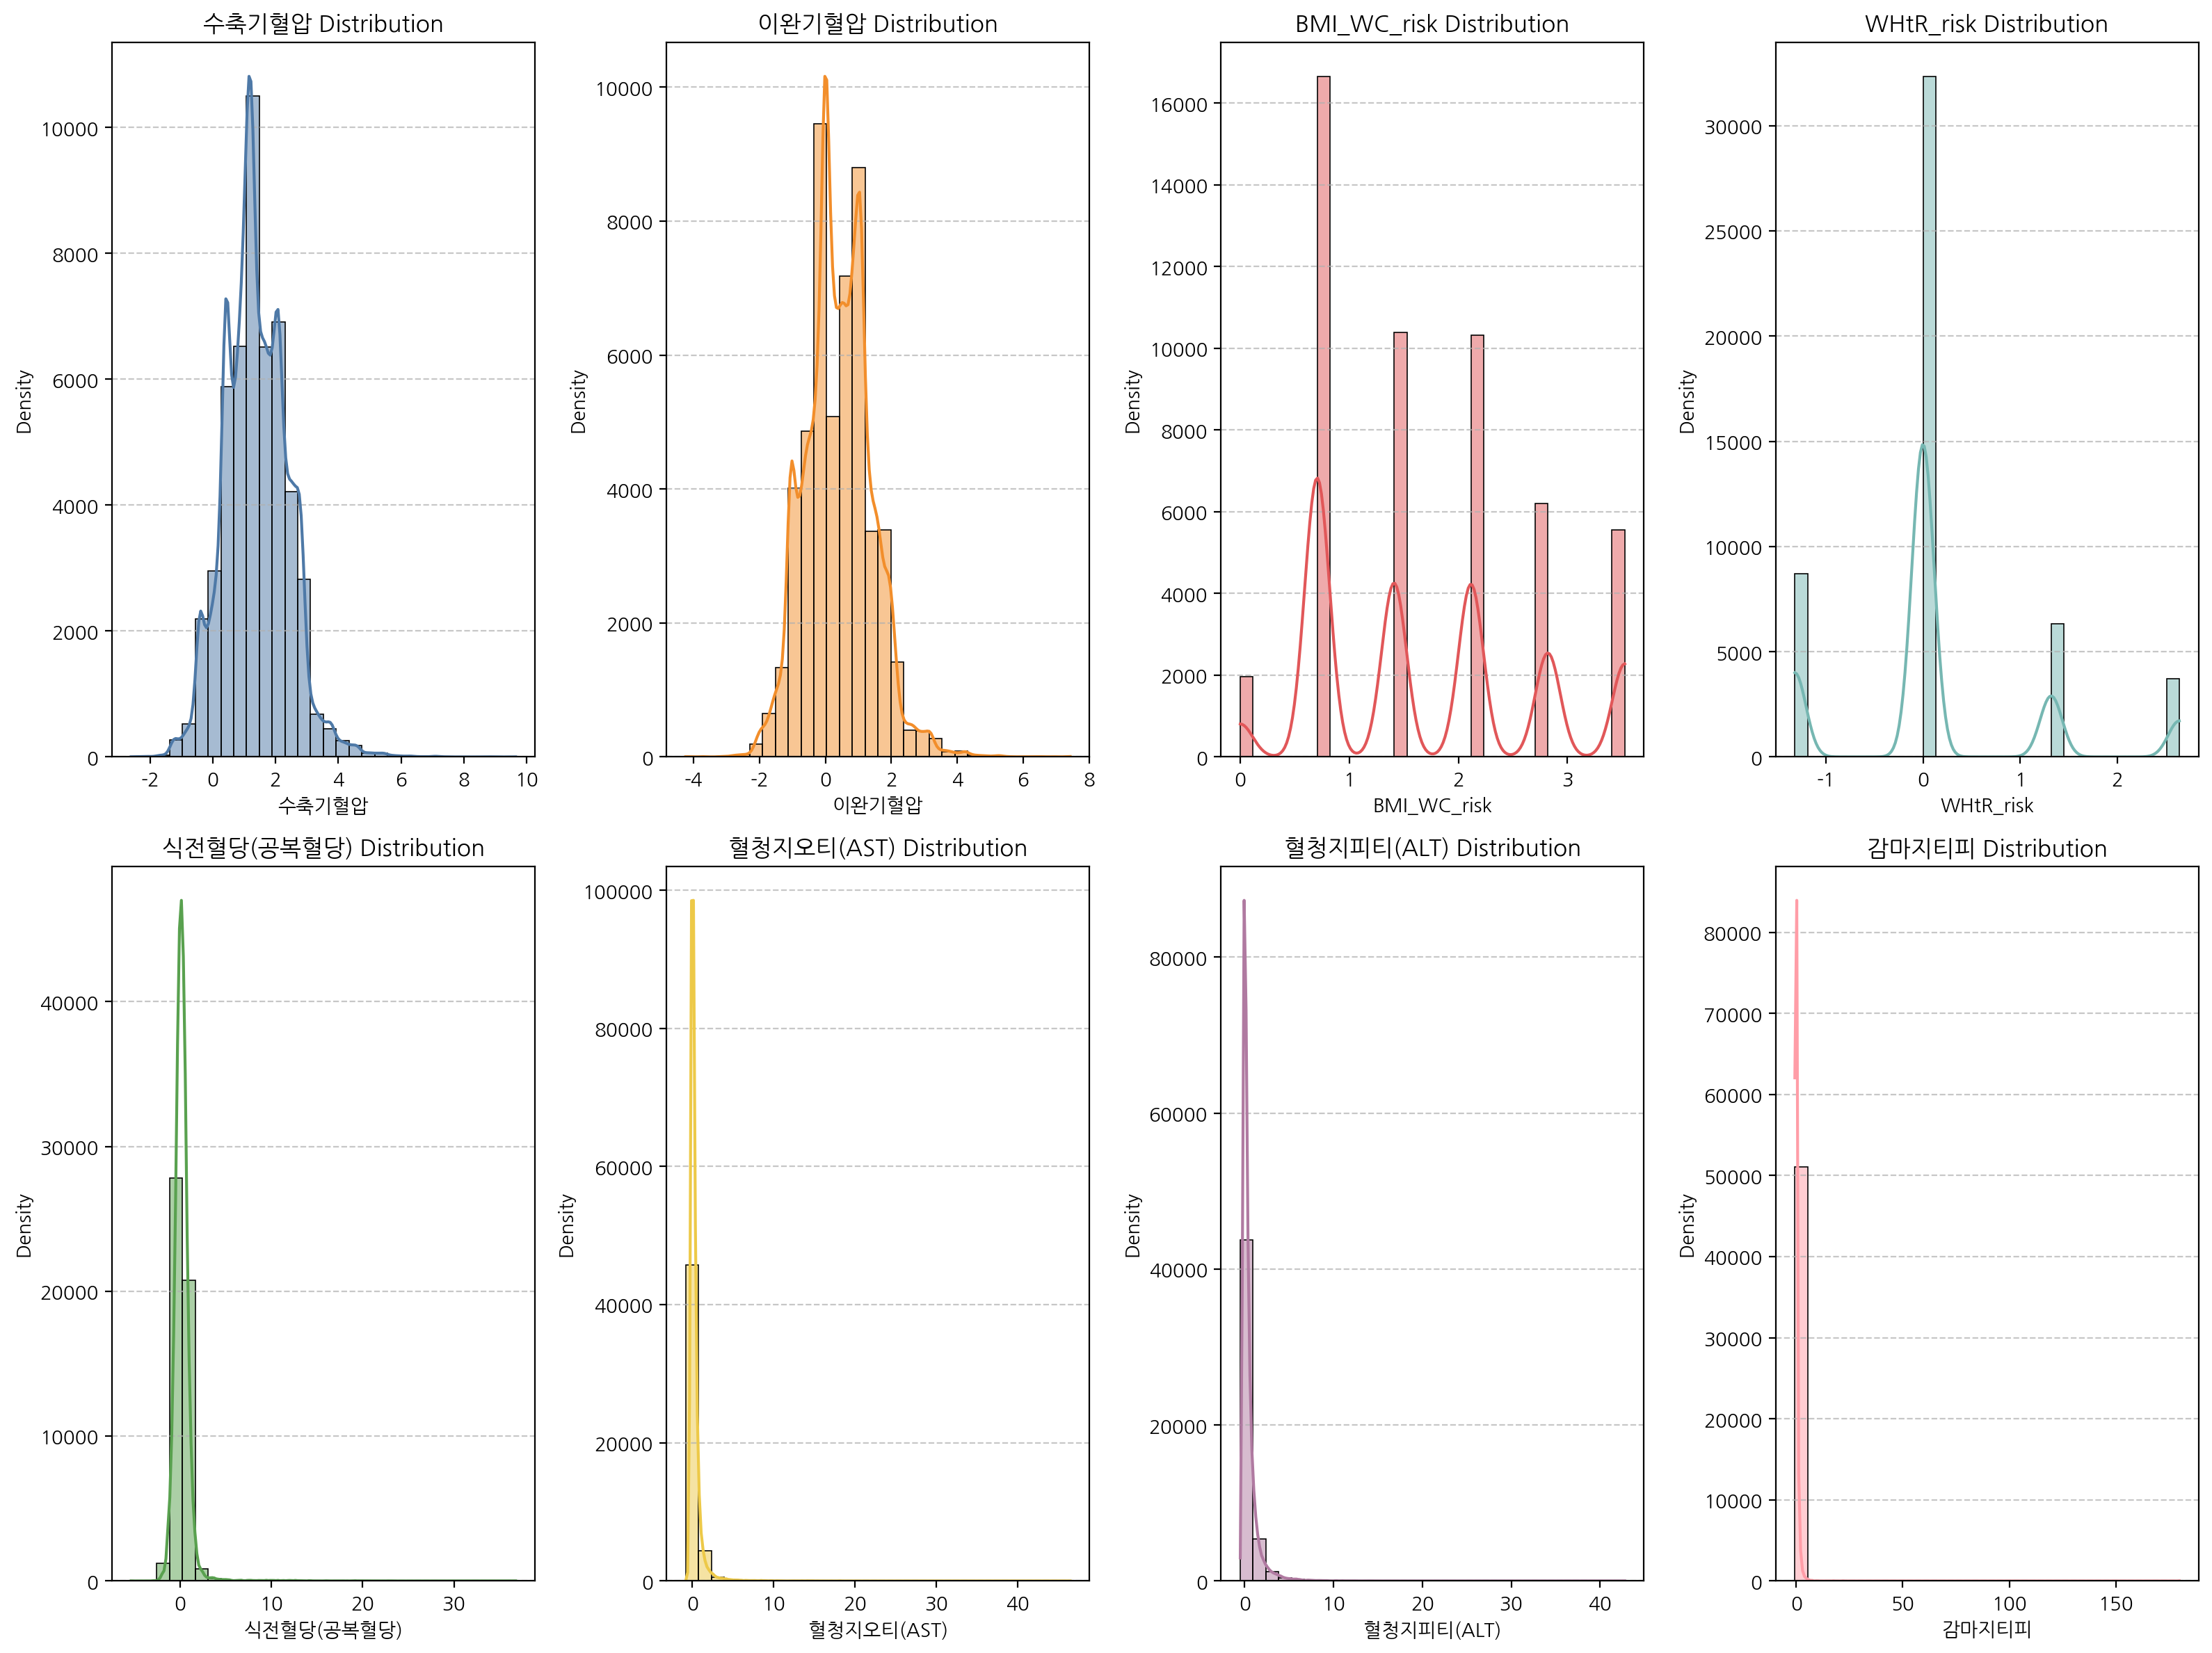

In [91]:
# 그래프 설정
plt.figure(figsize=(16, 12))
variables = [
    '수축기혈압', '이완기혈압', 
    'BMI_WC_risk', 'WHtR_risk', 
    '식전혈당(공복혈당)', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피'
]
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc948', '#b07aa1', '#ff9da7'] 

# 각 변수에 대해 히스토그램 생성
for i, var in enumerate(variables, 1):
    plt.subplot(2, 4, i)
    sns.histplot(Cardiovascular_group[var], kde=True, color=colors[i-1], bins=30)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [92]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['수축기혈압']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['수축기혈압_group'] = Cardiovascular_group['수축기혈압'].apply(assign_group)

Cardiovascular_group[['수축기혈압', '수축기혈압_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\3990203562.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['수축기혈압_group'] = Cardiovascular_group['수축기혈압'].apply(assign_group)


,수축기혈압,수축기혈압_group
0,1.258414,Moderate
1,0.419471,Low
2,2.516828,Very High
3,2.516828,Very High
4,-0.755048,Low
...,...,...
51090,1.174520,Moderate
51091,0.587260,Low
51092,-0.167789,Low
51093,1.342308,High


In [93]:
print(q1,q2,q3)

0.7550483549821935 1.2584139249703226 2.097356541617204


In [94]:
Cardiovascular_group['수축기혈압_group'].value_counts()

수축기혈압_group
Low          14115
High         14060
Moderate     12207
Very High    10713
Name: count, dtype: int64

In [95]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['이완기혈압']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['이완기혈압_group'] = Cardiovascular_group['이완기혈압'].apply(assign_group)

Cardiovascular_group[['이완기혈압', '이완기혈압_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\2906457348.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['이완기혈압_group'] = Cardiovascular_group['이완기혈압'].apply(assign_group)


,이완기혈압,이완기혈압_group
0,-0.106113,Moderate
1,0.000000,Moderate
2,1.697804,Very High
3,0.955014,High
4,-0.848902,Low
...,...,...
51090,0.530564,High
51091,-0.106113,Moderate
51092,-0.636676,Low
51093,-0.212225,Low


In [96]:
print(q1,q2,q3)

-0.2122254436631526 0.3183381654947289 1.0611272183157632


In [97]:
Cardiovascular_group['이완기혈압_group'].value_counts()

이완기혈압_group
High         14991
Low          14189
Moderate     11459
Very High    10456
Name: count, dtype: int64

In [98]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['BMI_WC_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['BMI_WC_risk_group'] = Cardiovascular_group['BMI_WC_risk'].apply(assign_group)

Cardiovascular_group[['BMI_WC_risk', 'BMI_WC_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\2484406126.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['BMI_WC_risk_group'] = Cardiovascular_group['BMI_WC_risk'].apply(assign_group)


,BMI_WC_risk,BMI_WC_risk_group
0,2.820355,Very High
1,1.410177,Moderate
2,2.115266,High
3,2.115266,High
4,0.000000,Low
...,...,...
51090,2.115266,High
51091,1.410177,Moderate
51092,0.705089,Low
51093,1.410177,Moderate


In [99]:
print(q1,q2,q3)

0.7050886392072224 1.4101772784144446 2.115265917621667


In [100]:
Cardiovascular_group['BMI_WC_risk_group'].value_counts()

BMI_WC_risk_group
Low          18623
Very High    11767
Moderate     10387
High         10318
Name: count, dtype: int64

In [101]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['WHtR_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['WHtR_risk_group'] = Cardiovascular_group['WHtR_risk'].apply(assign_group)

Cardiovascular_group[['WHtR_risk', 'WHtR_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\2300125776.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['WHtR_risk_group'] = Cardiovascular_group['WHtR_risk'].apply(assign_group)


,WHtR_risk,WHtR_risk_group
0,1.317652,Very High
1,0.000000,Low
2,0.000000,Low
3,0.000000,Low
4,-1.317652,Low
...,...,...
51090,0.000000,Low
51091,0.000000,Low
51092,-1.317652,Low
51093,0.000000,Low


In [102]:
print(q1,q2,q3)

0.0 0.0 0.0


In [103]:
Cardiovascular_group['WHtR_risk_group'].value_counts()

WHtR_risk_group
Low          41057
Very High    10038
Name: count, dtype: int64

In [104]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['식전혈당(공복혈당)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['식전혈당(공복혈당)_group'] = Cardiovascular_group['식전혈당(공복혈당)'].apply(assign_group)

Cardiovascular_group[['식전혈당(공복혈당)', '식전혈당(공복혈당)_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\47368446.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['식전혈당(공복혈당)_group'] = Cardiovascular_group['식전혈당(공복혈당)'].apply(assign_group)


,식전혈당(공복혈당),식전혈당(공복혈당)_group
0,0.138930,Moderate
1,0.416790,High
2,0.625186,Very High
3,0.555720,High
4,-0.486255,Low
...,...,...
51090,0.694651,Very High
51091,-0.347325,Low
51092,0.069465,Moderate
51093,0.486255,High


In [105]:
print(q1,q2,q3)

-0.2778602250653545 0.1389301125326772 0.555720450130709


In [106]:
Cardiovascular_group['식전혈당(공복혈당)_group'].value_counts()

식전혈당(공복혈당)_group
Moderate     13568
Low          13126
High         12663
Very High    11738
Name: count, dtype: int64

In [107]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['혈청지오티(AST)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['혈청지오티(AST)_group'] = Cardiovascular_group['혈청지오티(AST)'].apply(assign_group)

Cardiovascular_group[['혈청지오티(AST)', '혈청지오티(AST)_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_5320\2276222144.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['혈청지오티(AST)_group'] = Cardiovascular_group['혈청지오티(AST)'].apply(assign_group)


,혈청지오티(AST),혈청지오티(AST)_group
0,0.475003,Very High
1,0.345457,High
2,0.734096,Very High
3,0.000000,Moderate
4,0.086364,Moderate
...,...,...
51090,0.431821,Very High
51091,0.129546,High
51092,-0.172728,Low
51093,1.209099,Very High


In [108]:
print(q1,q2,q3)

-0.0863642325109801 0.0863642325109801 0.3454569300439206


In [109]:
Cardiovascular_group['혈청지오티(AST)_group'].value_counts()

혈청지오티(AST)_group
Moderate     13490
Low          13054
High         12425
Very High    12126
Name: count, dtype: int64

In [110]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['혈청지피티(ALT)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['혈청지피티(ALT)_group'] = Cardiovascular_group['혈청지피티(ALT)'].apply(assign_group)

Cardiovascular_group[['혈청지피티(ALT)', '혈청지피티(ALT)_group']]

,혈청지피티(ALT),혈청지피티(ALT)_group
0,0.990115,Very High
1,0.113620,Moderate
2,0.892727,Very High
3,0.243471,High
4,-0.016231,Moderate
...,...,...
51090,0.113620,Moderate
51091,0.633024,Very High
51092,0.016231,Moderate
51093,2.808032,Very High


In [111]:
print(q1,q2,q3)

-0.0486941910583272 0.146082573174982 0.5356361016416007


In [112]:
Cardiovascular_group['혈청지피티(ALT)_group'].value_counts()

혈청지피티(ALT)_group
Low          14683
Very High    12481
High         12016
Moderate     11915
Name: count, dtype: int64

In [113]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['감마지티피']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['감마지티피_group'] = Cardiovascular_group['감마지티피'].apply(assign_group)

Cardiovascular_group[['감마지티피', '감마지티피_group']]

,감마지티피,감마지티피_group
0,-0.379034,Low
1,-0.234640,High
2,0.397083,Very High
3,-0.072197,High
4,-0.360985,Low
...,...,...
51090,-0.198542,High
51091,-0.270739,Moderate
51092,-0.415133,Low
51093,1.714678,Very High


In [114]:
print(q1,q2,q3)

-0.360984875742475 -0.2526894130197324 -0.0180492437871237


In [115]:
Cardiovascular_group['감마지티피_group'].value_counts()

감마지티피_group
Low          14440
Very High    12587
High         12367
Moderate     11701
Name: count, dtype: int64

In [116]:
def classify(row):
    # 위험 기준 설정: 하나라도 'High' 또는 'Very High'일 경우 '위험'
    if (row['수축기혈압_group'] in ['Very High'] 
        or
        row['이완기혈압_group'] in ['Very High'] 
        or
        row['BMI_WC_risk_group'] in ['Very High'] 
        or
        row['WHtR_risk_group'] in ['Very High'] 
        or
        row['식전혈당(공복혈당)_group'] in ['Very High'] 
        or      
        row['혈청지오티(AST)_group'] in ['Very High'] 
        or 
        row['혈청지피티(ALT)_group'] in ['Very High'] 
        or 
        row['감마지티피_group'] in ['Very High']):
        return 'Suspected Cardiovascular'
    else:
        return 'Normal'

# '분류' 열 생성
Cardiovascular_group['분류'] = Cardiovascular_group.apply(classify, axis=1)

# 결과 확인
Cardiovascular_group.head()

,수축기혈압,이완기혈압,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,혈청지오티(AST),혈청지피티(ALT),감마지티피,수축기혈압_group,이완기혈압_group,BMI_WC_risk_group,WHtR_risk_group,식전혈당(공복혈당)_group,혈청지오티(AST)_group,혈청지피티(ALT)_group,감마지티피_group,분류
0,1.258414,-0.106113,0.138930,2.820355,1.317652,0.475003,0.990115,-0.379034,Moderate,Moderate,Very High,Very High,Moderate,Very High,Very High,Low,Suspected Cardiovascular
1,0.419471,0.000000,0.416790,1.410177,0.000000,0.345457,0.113620,-0.234640,Low,Moderate,Moderate,Low,High,High,Moderate,High,Normal
2,2.516828,1.697804,0.625186,2.115266,0.000000,0.734096,0.892727,0.397083,Very High,Very High,High,Low,Very High,Very High,Very High,Very High,Suspected Cardiovascular
3,2.516828,0.955014,0.555720,2.115266,0.000000,0.000000,0.243471,-0.072197,Very High,High,High,Low,High,Moderate,High,High,Suspected Cardiovascular
4,-0.755048,-0.848902,-0.486255,0.000000,-1.317652,0.086364,-0.016231,-0.360985,Low,Low,Low,Low,Low,Moderate,Moderate,Low,Normal


In [117]:
# 수정 후
Cardiovascular_group['분류'].value_counts() 

분류
Suspected Cardiovascular    33398
Normal                      17697
Name: count, dtype: int64

## '분류' 열들만 보아서 데이터셋 합치기 (열 9개)
- 51095 rows × 9 columns

- Blood_Pressure_group
- Anemia_group
- Liver_Kidney_group
- Obesity_group
- Smoking_Alcohol_group
- Vision_group
- Hearing_group
- Diabetes_group
- Cardiovascular_group

In [118]:
Blood_Pressure_group = Blood_Pressure_group.rename(columns={'분류': 'Blood_Pressure_group'})
Anemia_group = Anemia_group.rename(columns={'분류': 'Anemia_group'})
Liver_Kidney_group = Liver_Kidney_group.rename(columns={'분류': 'Liver_Kidney_group'})
Obesity_group = Obesity_group.rename(columns={'분류': 'Obesity_group'})
Smoking_Alcohol_group = Smoking_Alcohol_group.rename(columns={'분류': 'Smoking_Alcohol_group'})
Vision_group = Vision_group.rename(columns={'분류': 'Vision_group'})
Hearing_group = Hearing_group.rename(columns={'분류': 'Hearing_group'})
Diabetes_group = Diabetes_group.rename(columns={'분류': 'Diabetes_group'})
Cardiovascular_group = Cardiovascular_group.rename(columns={'분류': 'Cardiovascular_group'})

In [119]:
male_final_grouping = []
male_final_grouping.append(Blood_Pressure_group[['Blood_Pressure_group']])
male_final_grouping.append(Anemia_group[['Anemia_group']])
male_final_grouping.append(Liver_Kidney_group[['Liver_Kidney_group']])
male_final_grouping.append(Obesity_group[['Obesity_group']])
male_final_grouping.append(Smoking_Alcohol_group[['Smoking_Alcohol_group']])
male_final_grouping.append(Vision_group[['Vision_group']])
male_final_grouping.append(Hearing_group[['Hearing_group']])
male_final_grouping.append(Diabetes_group[['Diabetes_group']])
male_final_grouping.append(Cardiovascular_group[['Cardiovascular_group']])

male_final_grouping

[      Blood_Pressure_group
 0             Hypertension
 1                   Normal
 2             Hypertension
 3             Hypertension
 4                   Normal
 ...                    ...
 51090         Hypertension
 51091               Normal
 51092               Normal
 51093         Hypertension
 51094         Hypertension
 
 [51095 rows x 1 columns],
            Anemia_group
 0      Suspected Anemia
 1      Suspected Anemia
 2                Normal
 3                Normal
 4      Suspected Anemia
 ...                 ...
 51090  Suspected Anemia
 51091  Suspected Anemia
 51092            Normal
 51093            Normal
 51094            Normal
 
 [51095 rows x 1 columns],
                    Liver_Kidney_group
 0      Suspected liver/kidney disease
 1      Suspected liver/kidney disease
 2      Suspected liver/kidney disease
 3      Suspected liver/kidney disease
 4                              Normal
 ...                               ...
 51090  Suspected liver/kidney di

In [120]:
try:
    male_final_grouping = pd.concat(male_final_grouping, axis=1)
except NameError as e:
    male_final_grouping = str(e)

male_final_grouping

,Blood_Pressure_group,Anemia_group,Liver_Kidney_group,Obesity_group,Smoking_Alcohol_group,Vision_group,Hearing_group,Diabetes_group,Cardiovascular_group
0,Hypertension,Suspected Anemia,Suspected liver/kidney disease,Weight loss needed,Alcohol,Vision risk,Normal,Suspected Diabetes,Suspected Cardiovascular
1,Normal,Suspected Anemia,Suspected liver/kidney disease,Normal,Smoking and Alcohol,Normal,Normal,Suspected Diabetes,Normal
2,Hypertension,Normal,Suspected liver/kidney disease,Weight loss needed,Smoking and Alcohol,Vision risk,Normal,Suspected Diabetes,Suspected Cardiovascular
3,Hypertension,Normal,Suspected liver/kidney disease,Weight loss needed,healthy,Vision risk,Normal,Suspected Diabetes,Suspected Cardiovascular
4,Normal,Suspected Anemia,Normal,Weight gain needed,Smoking and Alcohol,Vision risk,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...
51090,Hypertension,Suspected Anemia,Suspected liver/kidney disease,Weight loss needed,healthy,Normal,Normal,Suspected Diabetes,Suspected Cardiovascular
51091,Normal,Suspected Anemia,Suspected liver/kidney disease,Normal,Alcohol,Vision risk,Normal,Normal,Suspected Cardiovascular
51092,Normal,Normal,Suspected liver/kidney disease,Weight gain needed,Alcohol,Normal,Normal,Normal,Normal
51093,Hypertension,Normal,Suspected liver/kidney disease,Normal,Alcohol,Normal,Normal,Suspected Diabetes,Suspected Cardiovascular


In [121]:
male_final_grouping.to_csv(r"C:\Users\sim\Desktop\medical\grouping by quantile\male_final_grouping.csv", index=False)